In [ ]:
from google.colab import drive
drive.mount('drive')

Mounted at drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

In [ ]:
%%time
df = pd.read_csv("/content/drive/MyDrive/Major Project/dataset_processed.csv")

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import log_loss
import joblib

In [ ]:
X = df.drop('Target', axis = 1)
y = df['Target']

In [ ]:
print(X.memory_usage(deep=True).sum() / (1024 ** 3), "GB")  # Memory usage in GB

0.6857056096196175 GB


In [ ]:

# model = LogisticRegression()
# rfe = RFE(estimator = model,
#           n_features_to_select = 5)
# rfe.fit(X, y)

# top_10_features = X.columnns[rfe.support_]

# print('Top 10 features selected by RFE with Logistic Regression:')
# print(top_10_features)

In [ ]:
model = SGDClassifier(loss = 'log_loss',
                      max_iter = 1,
                      tol = None,
                      random_state = 42,
                      warm_start = True,
                      learning_rate = 'adaptive',
                      eta0 = 0.01)

epochs = 1000
batch_size = 50000
patience = 5
best_loss = float("inf")
epochs_no_improve = 0

for epoch in tqdm(range(epochs), desc = "Training Progress"):
  for i in range(0, len(X), batch_size):
    X_batch = X[i:i + batch_size]
    y_batch = y[i:i + batch_size]
    model.partial_fit(X, y, classes = np.unique(y))

    current_loss = log_loss(y, model.predict_proba(X))

    if current_loss < best_loss:
      best_loss = current_loss
      epochs_no_improve = 0
    else:
      epochs_no_improve += 1

    if epochs_no_improve >= patience:
      print(f"Early stopping at epoch {epoch}")
      break

    if epoch % 100 == 0:
      joblib.dump(model, f"model_checkpoint_epoch_{epoch}.pkl")


feature_importances = np.abs(model.coef_[0])

feature_importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance': feature_importances
})

print("Top 10 important Features for Logistice Regression:")
print(feature_importance_df.sort_values(by = 'importance',
                                        ascending = False).head(10))

Training Progress:   0%|          | 1/1000 [00:23<6:31:22, 23.51s/it]

Early stopping at epoch 0


Training Progress:   0%|          | 2/1000 [00:27<3:15:55, 11.78s/it]

Early stopping at epoch 1


Training Progress:   0%|          | 3/1000 [00:31<2:19:50,  8.42s/it]

Early stopping at epoch 2


Training Progress:   0%|          | 4/1000 [00:35<1:52:13,  6.76s/it]

Early stopping at epoch 3


Training Progress:   0%|          | 5/1000 [00:39<1:33:25,  5.63s/it]

Early stopping at epoch 4


Training Progress:   1%|          | 6/1000 [00:42<1:22:05,  4.96s/it]

Early stopping at epoch 5


Training Progress:   1%|          | 7/1000 [00:47<1:21:19,  4.91s/it]

Early stopping at epoch 6


Training Progress:   1%|          | 8/1000 [00:51<1:14:08,  4.48s/it]

Early stopping at epoch 7


Training Progress:   1%|          | 9/1000 [00:54<1:09:15,  4.19s/it]

Early stopping at epoch 8


Training Progress:   1%|          | 10/1000 [00:58<1:08:29,  4.15s/it]

Early stopping at epoch 9


Training Progress:   1%|          | 11/1000 [01:03<1:12:03,  4.37s/it]

Early stopping at epoch 10


Training Progress:   1%|          | 12/1000 [01:07<1:08:50,  4.18s/it]

Early stopping at epoch 11


Training Progress:   1%|▏         | 13/1000 [01:31<2:45:44, 10.08s/it]

Early stopping at epoch 12


Training Progress:   1%|▏         | 14/1000 [01:34<2:13:02,  8.10s/it]

Early stopping at epoch 13


Training Progress:   2%|▏         | 15/1000 [01:38<1:50:51,  6.75s/it]

Early stopping at epoch 14


Training Progress:   2%|▏         | 16/1000 [01:43<1:42:02,  6.22s/it]

Early stopping at epoch 15


Training Progress:   2%|▏         | 17/1000 [01:46<1:28:50,  5.42s/it]

Early stopping at epoch 16


Training Progress:   2%|▏         | 18/1000 [01:50<1:19:36,  4.86s/it]

Early stopping at epoch 17


Training Progress:   2%|▏         | 19/1000 [01:54<1:15:41,  4.63s/it]

Early stopping at epoch 18


Training Progress:   2%|▏         | 20/1000 [01:58<1:14:15,  4.55s/it]

Early stopping at epoch 19


Training Progress:   2%|▏         | 21/1000 [02:02<1:09:11,  4.24s/it]

Early stopping at epoch 20


Training Progress:   2%|▏         | 22/1000 [02:06<1:05:53,  4.04s/it]

Early stopping at epoch 21


Training Progress:   2%|▏         | 23/1000 [02:10<1:09:29,  4.27s/it]

Early stopping at epoch 22


Training Progress:   2%|▏         | 24/1000 [02:14<1:05:52,  4.05s/it]

Early stopping at epoch 23


Training Progress:   2%|▎         | 25/1000 [02:18<1:04:45,  3.98s/it]

Early stopping at epoch 24


Training Progress:   3%|▎         | 26/1000 [02:22<1:04:49,  3.99s/it]

Early stopping at epoch 25


Training Progress:   3%|▎         | 27/1000 [02:26<1:08:06,  4.20s/it]

Early stopping at epoch 26


Training Progress:   3%|▎         | 28/1000 [02:30<1:04:48,  4.00s/it]

Early stopping at epoch 27


Training Progress:   3%|▎         | 29/1000 [02:34<1:02:28,  3.86s/it]

Early stopping at epoch 28


Training Progress:   3%|▎         | 30/1000 [02:38<1:07:42,  4.19s/it]

Early stopping at epoch 29


Training Progress:   3%|▎         | 31/1000 [02:42<1:04:58,  4.02s/it]

Early stopping at epoch 30


Training Progress:   3%|▎         | 32/1000 [02:46<1:02:39,  3.88s/it]

Early stopping at epoch 31


Training Progress:   3%|▎         | 33/1000 [02:50<1:03:48,  3.96s/it]

Early stopping at epoch 32


Training Progress:   3%|▎         | 34/1000 [02:54<1:05:00,  4.04s/it]

Early stopping at epoch 33


Training Progress:   4%|▎         | 35/1000 [02:58<1:02:44,  3.90s/it]

Early stopping at epoch 34


Training Progress:   4%|▎         | 36/1000 [03:01<1:00:58,  3.80s/it]

Early stopping at epoch 35


Training Progress:   4%|▎         | 37/1000 [03:06<1:06:13,  4.13s/it]

Early stopping at epoch 36


Training Progress:   4%|▍         | 38/1000 [03:10<1:03:11,  3.94s/it]

Early stopping at epoch 37


Training Progress:   4%|▍         | 39/1000 [03:13<1:01:16,  3.83s/it]

Early stopping at epoch 38


Training Progress:   4%|▍         | 40/1000 [03:17<1:01:46,  3.86s/it]

Early stopping at epoch 39


Training Progress:   4%|▍         | 41/1000 [03:21<1:04:14,  4.02s/it]

Early stopping at epoch 40


Training Progress:   4%|▍         | 42/1000 [03:25<1:01:57,  3.88s/it]

Early stopping at epoch 41


Training Progress:   4%|▍         | 43/1000 [03:29<1:00:22,  3.78s/it]

Early stopping at epoch 42


Training Progress:   4%|▍         | 44/1000 [03:33<1:05:00,  4.08s/it]

Early stopping at epoch 43


Training Progress:   4%|▍         | 45/1000 [03:37<1:02:20,  3.92s/it]

Early stopping at epoch 44


Training Progress:   5%|▍         | 46/1000 [03:41<1:01:28,  3.87s/it]

Early stopping at epoch 45


Training Progress:   5%|▍         | 47/1000 [03:45<1:01:37,  3.88s/it]

Early stopping at epoch 46


Training Progress:   5%|▍         | 48/1000 [03:49<1:03:50,  4.02s/it]

Early stopping at epoch 47


Training Progress:   5%|▍         | 49/1000 [03:52<1:01:36,  3.89s/it]

Early stopping at epoch 48


Training Progress:   5%|▌         | 50/1000 [03:56<1:00:09,  3.80s/it]

Early stopping at epoch 49


Training Progress:   5%|▌         | 51/1000 [04:01<1:04:47,  4.10s/it]

Early stopping at epoch 50


Training Progress:   5%|▌         | 52/1000 [04:04<1:02:06,  3.93s/it]

Early stopping at epoch 51


Training Progress:   5%|▌         | 53/1000 [04:08<1:00:19,  3.82s/it]

Early stopping at epoch 52


Training Progress:   5%|▌         | 54/1000 [04:12<1:00:23,  3.83s/it]

Early stopping at epoch 53


Training Progress:   6%|▌         | 55/1000 [04:16<1:03:06,  4.01s/it]

Early stopping at epoch 54


Training Progress:   6%|▌         | 56/1000 [04:20<1:00:59,  3.88s/it]

Early stopping at epoch 55


Training Progress:   6%|▌         | 57/1000 [04:23<59:16,  3.77s/it]  

Early stopping at epoch 56


Training Progress:   6%|▌         | 58/1000 [04:28<1:03:00,  4.01s/it]

Early stopping at epoch 57


Training Progress:   6%|▌         | 59/1000 [04:32<1:01:04,  3.89s/it]

Early stopping at epoch 58


Training Progress:   6%|▌         | 60/1000 [04:35<59:04,  3.77s/it]  

Early stopping at epoch 59


Training Progress:   6%|▌         | 61/1000 [04:39<59:01,  3.77s/it]

Early stopping at epoch 60


Training Progress:   6%|▌         | 62/1000 [04:43<1:03:16,  4.05s/it]

Early stopping at epoch 61


Training Progress:   6%|▋         | 63/1000 [04:47<1:00:53,  3.90s/it]

Early stopping at epoch 62


Training Progress:   6%|▋         | 64/1000 [04:51<59:12,  3.79s/it]  

Early stopping at epoch 63


Training Progress:   6%|▋         | 65/1000 [04:55<1:01:21,  3.94s/it]

Early stopping at epoch 64


Training Progress:   7%|▋         | 66/1000 [05:18<2:29:45,  9.62s/it]

Early stopping at epoch 65


Training Progress:   7%|▋         | 67/1000 [05:22<2:03:44,  7.96s/it]

Early stopping at epoch 66


Training Progress:   7%|▋         | 68/1000 [05:26<1:46:39,  6.87s/it]

Early stopping at epoch 67


Training Progress:   7%|▋         | 69/1000 [05:30<1:31:02,  5.87s/it]

Early stopping at epoch 68


Training Progress:   7%|▋         | 70/1000 [05:33<1:20:12,  5.17s/it]

Early stopping at epoch 69


Training Progress:   7%|▋         | 71/1000 [05:38<1:19:09,  5.11s/it]

Early stopping at epoch 70


Training Progress:   7%|▋         | 72/1000 [05:42<1:12:30,  4.69s/it]

Early stopping at epoch 71


Training Progress:   7%|▋         | 73/1000 [05:45<1:07:14,  4.35s/it]

Early stopping at epoch 72


Training Progress:   7%|▋         | 74/1000 [05:49<1:05:45,  4.26s/it]

Early stopping at epoch 73


Training Progress:   8%|▊         | 75/1000 [05:54<1:06:00,  4.28s/it]

Early stopping at epoch 74


Training Progress:   8%|▊         | 76/1000 [05:57<1:02:35,  4.06s/it]

Early stopping at epoch 75


Training Progress:   8%|▊         | 77/1000 [06:01<59:54,  3.89s/it]  

Early stopping at epoch 76


Training Progress:   8%|▊         | 78/1000 [06:06<1:03:52,  4.16s/it]

Early stopping at epoch 77


Training Progress:   8%|▊         | 79/1000 [06:09<1:00:53,  3.97s/it]

Early stopping at epoch 78


Training Progress:   8%|▊         | 80/1000 [06:13<58:46,  3.83s/it]  

Early stopping at epoch 79


Training Progress:   8%|▊         | 81/1000 [06:17<58:42,  3.83s/it]

Early stopping at epoch 80


Training Progress:   8%|▊         | 82/1000 [06:21<1:01:39,  4.03s/it]

Early stopping at epoch 81


Training Progress:   8%|▊         | 83/1000 [06:25<59:22,  3.89s/it]  

Early stopping at epoch 82


Training Progress:   8%|▊         | 84/1000 [06:28<57:56,  3.80s/it]

Early stopping at epoch 83


Training Progress:   8%|▊         | 85/1000 [06:33<1:01:33,  4.04s/it]

Early stopping at epoch 84


Training Progress:   9%|▊         | 86/1000 [06:36<59:34,  3.91s/it]  

Early stopping at epoch 85


Training Progress:   9%|▊         | 87/1000 [06:40<58:50,  3.87s/it]

Early stopping at epoch 86


Training Progress:   9%|▉         | 88/1000 [06:44<58:24,  3.84s/it]

Early stopping at epoch 87


Training Progress:   9%|▉         | 89/1000 [06:48<1:01:22,  4.04s/it]

Early stopping at epoch 88


Training Progress:   9%|▉         | 90/1000 [06:52<58:55,  3.89s/it]  

Early stopping at epoch 89


Training Progress:   9%|▉         | 91/1000 [06:55<57:15,  3.78s/it]

Early stopping at epoch 90


Training Progress:   9%|▉         | 92/1000 [07:00<1:00:37,  4.01s/it]

Early stopping at epoch 91


Training Progress:   9%|▉         | 93/1000 [07:04<58:54,  3.90s/it]  

Early stopping at epoch 92


Training Progress:   9%|▉         | 94/1000 [07:07<57:05,  3.78s/it]

Early stopping at epoch 93


Training Progress:  10%|▉         | 95/1000 [07:11<55:43,  3.70s/it]

Early stopping at epoch 94


Training Progress:  10%|▉         | 96/1000 [07:15<1:00:11,  4.00s/it]

Early stopping at epoch 95


Training Progress:  10%|▉         | 97/1000 [07:19<58:02,  3.86s/it]  

Early stopping at epoch 96


Training Progress:  10%|▉         | 98/1000 [07:22<56:28,  3.76s/it]

Early stopping at epoch 97


Training Progress:  10%|▉         | 99/1000 [07:26<57:43,  3.84s/it]

Early stopping at epoch 98


Training Progress:  10%|█         | 100/1000 [07:31<59:52,  3.99s/it]

Early stopping at epoch 99


Training Progress:  10%|█         | 101/1000 [07:34<57:32,  3.84s/it]

Early stopping at epoch 100


Training Progress:  10%|█         | 102/1000 [07:38<56:21,  3.77s/it]

Early stopping at epoch 101


Training Progress:  10%|█         | 103/1000 [07:43<1:01:38,  4.12s/it]

Early stopping at epoch 102


Training Progress:  10%|█         | 104/1000 [07:46<58:51,  3.94s/it]  

Early stopping at epoch 103


Training Progress:  10%|█         | 105/1000 [07:50<57:04,  3.83s/it]

Early stopping at epoch 104


Training Progress:  11%|█         | 106/1000 [07:54<57:35,  3.87s/it]

Early stopping at epoch 105


Training Progress:  11%|█         | 107/1000 [07:58<59:54,  4.03s/it]

Early stopping at epoch 106


Training Progress:  11%|█         | 108/1000 [08:02<57:57,  3.90s/it]

Early stopping at epoch 107


Training Progress:  11%|█         | 109/1000 [08:05<56:29,  3.80s/it]

Early stopping at epoch 108


Training Progress:  11%|█         | 110/1000 [08:29<2:24:57,  9.77s/it]

Early stopping at epoch 109


Training Progress:  11%|█         | 111/1000 [08:53<3:27:08, 13.98s/it]

Early stopping at epoch 110


Training Progress:  11%|█         | 112/1000 [08:56<2:40:32, 10.85s/it]

Early stopping at epoch 111


Training Progress:  11%|█▏        | 113/1000 [09:00<2:08:13,  8.67s/it]

Early stopping at epoch 112


Training Progress:  11%|█▏        | 114/1000 [09:04<1:49:00,  7.38s/it]

Early stopping at epoch 113


Training Progress:  12%|█▏        | 115/1000 [09:08<1:32:43,  6.29s/it]

Early stopping at epoch 114


Training Progress:  12%|█▏        | 116/1000 [09:12<1:20:28,  5.46s/it]

Early stopping at epoch 115


Training Progress:  12%|█▏        | 117/1000 [09:15<1:12:01,  4.89s/it]

Early stopping at epoch 116


Training Progress:  12%|█▏        | 118/1000 [09:20<1:11:12,  4.84s/it]

Early stopping at epoch 117


Training Progress:  12%|█▏        | 119/1000 [09:24<1:05:18,  4.45s/it]

Early stopping at epoch 118


Training Progress:  12%|█▏        | 120/1000 [09:27<1:01:25,  4.19s/it]

Early stopping at epoch 119


Training Progress:  12%|█▏        | 121/1000 [09:31<1:01:09,  4.17s/it]

Early stopping at epoch 120


Training Progress:  12%|█▏        | 122/1000 [09:35<1:01:20,  4.19s/it]

Early stopping at epoch 121


Training Progress:  12%|█▏        | 123/1000 [09:39<58:43,  4.02s/it]  

Early stopping at epoch 122


Training Progress:  12%|█▏        | 124/1000 [09:43<56:54,  3.90s/it]

Early stopping at epoch 123


Training Progress:  12%|█▎        | 125/1000 [09:48<1:00:48,  4.17s/it]

Early stopping at epoch 124


Training Progress:  13%|█▎        | 126/1000 [09:51<57:58,  3.98s/it]  

Early stopping at epoch 125


Training Progress:  13%|█▎        | 127/1000 [09:55<55:45,  3.83s/it]

Early stopping at epoch 126


Training Progress:  13%|█▎        | 128/1000 [09:59<56:19,  3.88s/it]

Early stopping at epoch 127


Training Progress:  13%|█▎        | 129/1000 [10:03<58:21,  4.02s/it]

Early stopping at epoch 128


Training Progress:  13%|█▎        | 130/1000 [10:06<56:07,  3.87s/it]

Early stopping at epoch 129


Training Progress:  13%|█▎        | 131/1000 [10:10<54:30,  3.76s/it]

Early stopping at epoch 130


Training Progress:  13%|█▎        | 132/1000 [10:15<58:11,  4.02s/it]

Early stopping at epoch 131


Training Progress:  13%|█▎        | 133/1000 [10:37<2:17:52,  9.54s/it]

Early stopping at epoch 132


Training Progress:  13%|█▎        | 134/1000 [10:42<1:56:27,  8.07s/it]

Early stopping at epoch 133


Training Progress:  14%|█▎        | 135/1000 [10:45<1:37:39,  6.77s/it]

Early stopping at epoch 134


Training Progress:  14%|█▎        | 136/1000 [10:49<1:23:30,  5.80s/it]

Early stopping at epoch 135


Training Progress:  14%|█▎        | 137/1000 [10:52<1:13:44,  5.13s/it]

Early stopping at epoch 136


Training Progress:  14%|█▍        | 138/1000 [10:57<1:11:58,  5.01s/it]

Early stopping at epoch 137


Training Progress:  14%|█▍        | 139/1000 [11:01<1:05:34,  4.57s/it]

Early stopping at epoch 138


Training Progress:  14%|█▍        | 140/1000 [11:04<1:01:08,  4.27s/it]

Early stopping at epoch 139


Training Progress:  14%|█▍        | 141/1000 [11:08<1:00:28,  4.22s/it]

Early stopping at epoch 140


Training Progress:  14%|█▍        | 142/1000 [11:13<1:00:31,  4.23s/it]

Early stopping at epoch 141


Training Progress:  14%|█▍        | 143/1000 [11:16<57:22,  4.02s/it]  

Early stopping at epoch 142


Training Progress:  14%|█▍        | 144/1000 [11:20<55:11,  3.87s/it]

Early stopping at epoch 143


Training Progress:  14%|█▍        | 145/1000 [11:25<59:31,  4.18s/it]

Early stopping at epoch 144


Training Progress:  15%|█▍        | 146/1000 [11:28<56:47,  3.99s/it]

Early stopping at epoch 145


Training Progress:  15%|█▍        | 147/1000 [11:32<54:45,  3.85s/it]

Early stopping at epoch 146


Training Progress:  15%|█▍        | 148/1000 [11:36<55:16,  3.89s/it]

Early stopping at epoch 147


Training Progress:  15%|█▍        | 149/1000 [11:40<57:52,  4.08s/it]

Early stopping at epoch 148


Training Progress:  15%|█▌        | 150/1000 [11:44<55:29,  3.92s/it]

Early stopping at epoch 149


Training Progress:  15%|█▌        | 151/1000 [11:47<53:45,  3.80s/it]

Early stopping at epoch 150


Training Progress:  15%|█▌        | 152/1000 [11:52<57:54,  4.10s/it]

Early stopping at epoch 151


Training Progress:  15%|█▌        | 153/1000 [11:56<55:27,  3.93s/it]

Early stopping at epoch 152


Training Progress:  15%|█▌        | 154/1000 [11:59<53:48,  3.82s/it]

Early stopping at epoch 153


Training Progress:  16%|█▌        | 155/1000 [12:03<54:08,  3.84s/it]

Early stopping at epoch 154


Training Progress:  16%|█▌        | 156/1000 [12:07<56:19,  4.00s/it]

Early stopping at epoch 155


Training Progress:  16%|█▌        | 157/1000 [12:11<54:23,  3.87s/it]

Early stopping at epoch 156


Training Progress:  16%|█▌        | 158/1000 [12:15<53:09,  3.79s/it]

Early stopping at epoch 157


Training Progress:  16%|█▌        | 159/1000 [12:19<56:59,  4.07s/it]

Early stopping at epoch 158


Training Progress:  16%|█▌        | 160/1000 [12:23<54:32,  3.90s/it]

Early stopping at epoch 159


Training Progress:  16%|█▌        | 161/1000 [12:26<52:42,  3.77s/it]

Early stopping at epoch 160


Training Progress:  16%|█▌        | 162/1000 [12:30<52:45,  3.78s/it]

Early stopping at epoch 161


Training Progress:  16%|█▋        | 163/1000 [12:34<55:33,  3.98s/it]

Early stopping at epoch 162


Training Progress:  16%|█▋        | 164/1000 [12:57<2:13:43,  9.60s/it]

Early stopping at epoch 163


Training Progress:  16%|█▋        | 165/1000 [13:02<1:52:39,  8.10s/it]

Early stopping at epoch 164


Training Progress:  17%|█▋        | 166/1000 [13:05<1:33:38,  6.74s/it]

Early stopping at epoch 165


Training Progress:  17%|█▋        | 167/1000 [13:09<1:20:33,  5.80s/it]

Early stopping at epoch 166


Training Progress:  17%|█▋        | 168/1000 [13:13<1:13:58,  5.33s/it]

Early stopping at epoch 167


Training Progress:  17%|█▋        | 169/1000 [13:17<1:08:17,  4.93s/it]

Early stopping at epoch 168


Training Progress:  17%|█▋        | 170/1000 [13:21<1:02:19,  4.51s/it]

Early stopping at epoch 169


Training Progress:  17%|█▋        | 171/1000 [13:24<57:58,  4.20s/it]  

Early stopping at epoch 170


Training Progress:  17%|█▋        | 172/1000 [13:29<1:00:32,  4.39s/it]

Early stopping at epoch 171


Training Progress:  17%|█▋        | 173/1000 [13:33<56:54,  4.13s/it]  

Early stopping at epoch 172


Training Progress:  17%|█▋        | 174/1000 [13:36<54:22,  3.95s/it]

Early stopping at epoch 173


Training Progress:  18%|█▊        | 175/1000 [13:40<55:31,  4.04s/it]

Early stopping at epoch 174


Training Progress:  18%|█▊        | 176/1000 [13:45<56:41,  4.13s/it]

Early stopping at epoch 175


Training Progress:  18%|█▊        | 177/1000 [13:48<54:12,  3.95s/it]

Early stopping at epoch 176


Training Progress:  18%|█▊        | 178/1000 [13:52<52:30,  3.83s/it]

Early stopping at epoch 177


Training Progress:  18%|█▊        | 179/1000 [13:57<56:18,  4.11s/it]

Early stopping at epoch 178


Training Progress:  18%|█▊        | 180/1000 [14:00<53:59,  3.95s/it]

Early stopping at epoch 179


Training Progress:  18%|█▊        | 181/1000 [14:04<52:10,  3.82s/it]

Early stopping at epoch 180


Training Progress:  18%|█▊        | 182/1000 [14:07<52:13,  3.83s/it]

Early stopping at epoch 181


Training Progress:  18%|█▊        | 183/1000 [14:12<54:38,  4.01s/it]

Early stopping at epoch 182


Training Progress:  18%|█▊        | 184/1000 [14:15<52:38,  3.87s/it]

Early stopping at epoch 183


Training Progress:  18%|█▊        | 185/1000 [14:19<51:15,  3.77s/it]

Early stopping at epoch 184


Training Progress:  19%|█▊        | 186/1000 [14:24<54:24,  4.01s/it]

Early stopping at epoch 185


Training Progress:  19%|█▊        | 187/1000 [14:27<52:43,  3.89s/it]

Early stopping at epoch 186


Training Progress:  19%|█▉        | 188/1000 [14:31<51:28,  3.80s/it]

Early stopping at epoch 187


Training Progress:  19%|█▉        | 189/1000 [14:34<50:51,  3.76s/it]

Early stopping at epoch 188


Training Progress:  19%|█▉        | 190/1000 [14:58<2:11:04,  9.71s/it]

Early stopping at epoch 189


Training Progress:  19%|█▉        | 191/1000 [15:02<1:46:03,  7.87s/it]

Early stopping at epoch 190


Training Progress:  19%|█▉        | 192/1000 [15:06<1:33:21,  6.93s/it]

Early stopping at epoch 191


Training Progress:  19%|█▉        | 193/1000 [15:10<1:19:37,  5.92s/it]

Early stopping at epoch 192


Training Progress:  19%|█▉        | 194/1000 [15:13<1:10:04,  5.22s/it]

Early stopping at epoch 193


Training Progress:  20%|█▉        | 195/1000 [15:18<1:05:33,  4.89s/it]

Early stopping at epoch 194


Training Progress:  20%|█▉        | 196/1000 [15:22<1:02:40,  4.68s/it]

Early stopping at epoch 195


Training Progress:  20%|█▉        | 197/1000 [15:25<58:08,  4.34s/it]  

Early stopping at epoch 196


Training Progress:  20%|█▉        | 198/1000 [15:29<54:57,  4.11s/it]

Early stopping at epoch 197


Training Progress:  20%|█▉        | 199/1000 [15:34<57:43,  4.32s/it]

Early stopping at epoch 198


Training Progress:  20%|██        | 200/1000 [15:37<54:32,  4.09s/it]

Early stopping at epoch 199


Training Progress:  20%|██        | 201/1000 [15:41<52:56,  3.98s/it]

Early stopping at epoch 200


Training Progress:  20%|██        | 202/1000 [15:45<53:04,  3.99s/it]

Early stopping at epoch 201


Training Progress:  20%|██        | 203/1000 [15:49<54:18,  4.09s/it]

Early stopping at epoch 202


Training Progress:  20%|██        | 204/1000 [15:53<52:04,  3.93s/it]

Early stopping at epoch 203


Training Progress:  20%|██        | 205/1000 [15:56<50:30,  3.81s/it]

Early stopping at epoch 204


Training Progress:  21%|██        | 206/1000 [16:01<54:29,  4.12s/it]

Early stopping at epoch 205


Training Progress:  21%|██        | 207/1000 [16:05<51:55,  3.93s/it]

Early stopping at epoch 206


Training Progress:  21%|██        | 208/1000 [16:08<50:13,  3.81s/it]

Early stopping at epoch 207


Training Progress:  21%|██        | 209/1000 [16:12<50:11,  3.81s/it]

Early stopping at epoch 208


Training Progress:  21%|██        | 210/1000 [16:17<52:54,  4.02s/it]

Early stopping at epoch 209


Training Progress:  21%|██        | 211/1000 [16:20<51:02,  3.88s/it]

Early stopping at epoch 210


Training Progress:  21%|██        | 212/1000 [16:24<49:31,  3.77s/it]

Early stopping at epoch 211


Training Progress:  21%|██▏       | 213/1000 [16:28<52:23,  3.99s/it]

Early stopping at epoch 212


Training Progress:  21%|██▏       | 214/1000 [16:32<51:01,  3.89s/it]

Early stopping at epoch 213


Training Progress:  22%|██▏       | 215/1000 [16:35<49:38,  3.79s/it]

Early stopping at epoch 214


Training Progress:  22%|██▏       | 216/1000 [16:39<49:42,  3.80s/it]

Early stopping at epoch 215


Training Progress:  22%|██▏       | 217/1000 [16:44<52:55,  4.06s/it]

Early stopping at epoch 216


Training Progress:  22%|██▏       | 218/1000 [16:47<50:50,  3.90s/it]

Early stopping at epoch 217


Training Progress:  22%|██▏       | 219/1000 [16:51<49:32,  3.81s/it]

Early stopping at epoch 218


Training Progress:  22%|██▏       | 220/1000 [16:55<51:59,  4.00s/it]

Early stopping at epoch 219


Training Progress:  22%|██▏       | 221/1000 [16:59<50:52,  3.92s/it]

Early stopping at epoch 220


Training Progress:  22%|██▏       | 222/1000 [17:03<49:25,  3.81s/it]

Early stopping at epoch 221


Training Progress:  22%|██▏       | 223/1000 [17:06<48:23,  3.74s/it]

Early stopping at epoch 222


Training Progress:  22%|██▏       | 224/1000 [17:11<52:06,  4.03s/it]

Early stopping at epoch 223


Training Progress:  22%|██▎       | 225/1000 [17:15<50:03,  3.88s/it]

Early stopping at epoch 224


Training Progress:  23%|██▎       | 226/1000 [17:18<48:27,  3.76s/it]

Early stopping at epoch 225


Training Progress:  23%|██▎       | 227/1000 [17:22<49:22,  3.83s/it]

Early stopping at epoch 226


Training Progress:  23%|██▎       | 228/1000 [17:26<50:49,  3.95s/it]

Early stopping at epoch 227


Training Progress:  23%|██▎       | 229/1000 [17:30<49:12,  3.83s/it]

Early stopping at epoch 228


Training Progress:  23%|██▎       | 230/1000 [17:33<47:58,  3.74s/it]

Early stopping at epoch 229


Training Progress:  23%|██▎       | 231/1000 [17:38<51:58,  4.06s/it]

Early stopping at epoch 230


Training Progress:  23%|██▎       | 232/1000 [17:42<50:20,  3.93s/it]

Early stopping at epoch 231


Training Progress:  23%|██▎       | 233/1000 [17:45<48:49,  3.82s/it]

Early stopping at epoch 232


Training Progress:  23%|██▎       | 234/1000 [17:49<49:29,  3.88s/it]

Early stopping at epoch 233


Training Progress:  24%|██▎       | 235/1000 [17:54<51:07,  4.01s/it]

Early stopping at epoch 234


Training Progress:  24%|██▎       | 236/1000 [17:57<49:14,  3.87s/it]

Early stopping at epoch 235


Training Progress:  24%|██▎       | 237/1000 [18:01<47:56,  3.77s/it]

Early stopping at epoch 236


Training Progress:  24%|██▍       | 238/1000 [18:05<51:41,  4.07s/it]

Early stopping at epoch 237


Training Progress:  24%|██▍       | 239/1000 [18:09<49:28,  3.90s/it]

Early stopping at epoch 238


Training Progress:  24%|██▍       | 240/1000 [18:13<48:03,  3.79s/it]

Early stopping at epoch 239


Training Progress:  24%|██▍       | 241/1000 [18:16<47:59,  3.79s/it]

Early stopping at epoch 240


Training Progress:  24%|██▍       | 242/1000 [18:21<50:35,  4.00s/it]

Early stopping at epoch 241


Training Progress:  24%|██▍       | 243/1000 [18:24<48:45,  3.87s/it]

Early stopping at epoch 242


Training Progress:  24%|██▍       | 244/1000 [18:28<47:35,  3.78s/it]

Early stopping at epoch 243


Training Progress:  24%|██▍       | 245/1000 [18:33<50:31,  4.02s/it]

Early stopping at epoch 244


Training Progress:  25%|██▍       | 246/1000 [18:36<48:50,  3.89s/it]

Early stopping at epoch 245


Training Progress:  25%|██▍       | 247/1000 [18:40<47:57,  3.82s/it]

Early stopping at epoch 246


Training Progress:  25%|██▍       | 248/1000 [18:43<47:26,  3.79s/it]

Early stopping at epoch 247


Training Progress:  25%|██▍       | 249/1000 [18:48<50:28,  4.03s/it]

Early stopping at epoch 248


Training Progress:  25%|██▌       | 250/1000 [18:52<48:35,  3.89s/it]

Early stopping at epoch 249


Training Progress:  25%|██▌       | 251/1000 [18:55<47:12,  3.78s/it]

Early stopping at epoch 250


Training Progress:  25%|██▌       | 252/1000 [18:59<49:01,  3.93s/it]

Early stopping at epoch 251


Training Progress:  25%|██▌       | 253/1000 [19:03<48:46,  3.92s/it]

Early stopping at epoch 252


Training Progress:  25%|██▌       | 254/1000 [19:07<47:15,  3.80s/it]

Early stopping at epoch 253


Training Progress:  26%|██▌       | 255/1000 [19:10<46:15,  3.73s/it]

Early stopping at epoch 254


Training Progress:  26%|██▌       | 256/1000 [19:34<2:00:10,  9.69s/it]

Early stopping at epoch 255


Training Progress:  26%|██▌       | 257/1000 [19:38<1:36:57,  7.83s/it]

Early stopping at epoch 256


Training Progress:  26%|██▌       | 258/1000 [19:42<1:26:06,  6.96s/it]

Early stopping at epoch 257


Training Progress:  26%|██▌       | 259/1000 [19:46<1:13:17,  5.93s/it]

Early stopping at epoch 258


Training Progress:  26%|██▌       | 260/1000 [19:50<1:04:27,  5.23s/it]

Early stopping at epoch 259


Training Progress:  26%|██▌       | 261/1000 [19:53<59:23,  4.82s/it]  

Early stopping at epoch 260


Training Progress:  26%|██▌       | 262/1000 [19:58<57:47,  4.70s/it]

Early stopping at epoch 261


Training Progress:  26%|██▋       | 263/1000 [20:01<53:26,  4.35s/it]

Early stopping at epoch 262


Training Progress:  26%|██▋       | 264/1000 [20:05<50:24,  4.11s/it]

Early stopping at epoch 263


Training Progress:  26%|██▋       | 265/1000 [20:09<51:56,  4.24s/it]

Early stopping at epoch 264


Training Progress:  27%|██▋       | 266/1000 [20:32<1:59:14,  9.75s/it]

Early stopping at epoch 265


Training Progress:  27%|██▋       | 267/1000 [20:36<1:39:28,  8.14s/it]

Early stopping at epoch 266


Training Progress:  27%|██▋       | 268/1000 [20:40<1:24:16,  6.91s/it]

Early stopping at epoch 267


Training Progress:  27%|██▋       | 269/1000 [20:44<1:11:44,  5.89s/it]

Early stopping at epoch 268


Training Progress:  27%|██▋       | 270/1000 [20:48<1:02:59,  5.18s/it]

Early stopping at epoch 269


Training Progress:  27%|██▋       | 271/1000 [20:52<1:01:24,  5.05s/it]

Early stopping at epoch 270


Training Progress:  27%|██▋       | 272/1000 [20:56<55:50,  4.60s/it]  

Early stopping at epoch 271


Training Progress:  27%|██▋       | 273/1000 [20:59<51:52,  4.28s/it]

Early stopping at epoch 272


Training Progress:  27%|██▋       | 274/1000 [21:03<51:05,  4.22s/it]

Early stopping at epoch 273


Training Progress:  28%|██▊       | 275/1000 [21:08<50:49,  4.21s/it]

Early stopping at epoch 274


Training Progress:  28%|██▊       | 276/1000 [21:11<48:24,  4.01s/it]

Early stopping at epoch 275


Training Progress:  28%|██▊       | 277/1000 [21:15<46:31,  3.86s/it]

Early stopping at epoch 276


Training Progress:  28%|██▊       | 278/1000 [21:20<50:04,  4.16s/it]

Early stopping at epoch 277


Training Progress:  28%|██▊       | 279/1000 [21:23<47:51,  3.98s/it]

Early stopping at epoch 278


Training Progress:  28%|██▊       | 280/1000 [21:27<46:08,  3.85s/it]

Early stopping at epoch 279


Training Progress:  28%|██▊       | 281/1000 [21:31<46:53,  3.91s/it]

Early stopping at epoch 280


Training Progress:  28%|██▊       | 282/1000 [21:35<48:21,  4.04s/it]

Early stopping at epoch 281


Training Progress:  28%|██▊       | 283/1000 [21:39<46:44,  3.91s/it]

Early stopping at epoch 282


Training Progress:  28%|██▊       | 284/1000 [21:42<45:46,  3.84s/it]

Early stopping at epoch 283


Training Progress:  28%|██▊       | 285/1000 [21:47<49:20,  4.14s/it]

Early stopping at epoch 284


Training Progress:  29%|██▊       | 286/1000 [21:51<47:10,  3.96s/it]

Early stopping at epoch 285


Training Progress:  29%|██▊       | 287/1000 [21:54<45:27,  3.83s/it]

Early stopping at epoch 286


Training Progress:  29%|██▉       | 288/1000 [21:58<45:40,  3.85s/it]

Early stopping at epoch 287


Training Progress:  29%|██▉       | 289/1000 [22:03<47:32,  4.01s/it]

Early stopping at epoch 288


Training Progress:  29%|██▉       | 290/1000 [22:06<45:51,  3.88s/it]

Early stopping at epoch 289


Training Progress:  29%|██▉       | 291/1000 [22:10<44:46,  3.79s/it]

Early stopping at epoch 290


Training Progress:  29%|██▉       | 292/1000 [22:14<48:13,  4.09s/it]

Early stopping at epoch 291


Training Progress:  29%|██▉       | 293/1000 [22:18<46:12,  3.92s/it]

Early stopping at epoch 292


Training Progress:  29%|██▉       | 294/1000 [22:22<44:54,  3.82s/it]

Early stopping at epoch 293


Training Progress:  30%|██▉       | 295/1000 [22:25<44:52,  3.82s/it]

Early stopping at epoch 294


Training Progress:  30%|██▉       | 296/1000 [22:30<47:01,  4.01s/it]

Early stopping at epoch 295


Training Progress:  30%|██▉       | 297/1000 [22:33<45:34,  3.89s/it]

Early stopping at epoch 296


Training Progress:  30%|██▉       | 298/1000 [22:37<44:12,  3.78s/it]

Early stopping at epoch 297


Training Progress:  30%|██▉       | 299/1000 [22:42<47:49,  4.09s/it]

Early stopping at epoch 298


Training Progress:  30%|███       | 300/1000 [22:45<46:05,  3.95s/it]

Early stopping at epoch 299


Training Progress:  30%|███       | 301/1000 [22:49<44:28,  3.82s/it]

Early stopping at epoch 300


Training Progress:  30%|███       | 302/1000 [22:53<43:55,  3.78s/it]

Early stopping at epoch 301


Training Progress:  30%|███       | 303/1000 [22:57<46:48,  4.03s/it]

Early stopping at epoch 302


Training Progress:  30%|███       | 304/1000 [23:19<1:50:12,  9.50s/it]

Early stopping at epoch 303


Training Progress:  30%|███       | 305/1000 [23:24<1:33:43,  8.09s/it]

Early stopping at epoch 304


Training Progress:  31%|███       | 306/1000 [23:28<1:17:52,  6.73s/it]

Early stopping at epoch 305


Training Progress:  31%|███       | 307/1000 [23:31<1:06:52,  5.79s/it]

Early stopping at epoch 306


Training Progress:  31%|███       | 308/1000 [23:35<1:00:47,  5.27s/it]

Early stopping at epoch 307


Training Progress:  31%|███       | 309/1000 [23:40<57:45,  5.02s/it]  

Early stopping at epoch 308


Training Progress:  31%|███       | 310/1000 [23:43<52:30,  4.57s/it]

Early stopping at epoch 309


Training Progress:  31%|███       | 311/1000 [23:47<48:49,  4.25s/it]

Early stopping at epoch 310


Training Progress:  31%|███       | 312/1000 [23:52<50:47,  4.43s/it]

Early stopping at epoch 311


Training Progress:  31%|███▏      | 313/1000 [23:55<47:46,  4.17s/it]

Early stopping at epoch 312


Training Progress:  31%|███▏      | 314/1000 [23:59<45:31,  3.98s/it]

Early stopping at epoch 313


Training Progress:  32%|███▏      | 315/1000 [24:03<45:19,  3.97s/it]

Early stopping at epoch 314


Training Progress:  32%|███▏      | 316/1000 [24:07<46:32,  4.08s/it]

Early stopping at epoch 315


Training Progress:  32%|███▏      | 317/1000 [24:11<44:28,  3.91s/it]

Early stopping at epoch 316


Training Progress:  32%|███▏      | 318/1000 [24:34<1:51:27,  9.81s/it]

Early stopping at epoch 317


Training Progress:  32%|███▏      | 319/1000 [24:38<1:30:02,  7.93s/it]

Early stopping at epoch 318


Training Progress:  32%|███▏      | 320/1000 [24:42<1:15:36,  6.67s/it]

Early stopping at epoch 319


Training Progress:  32%|███▏      | 321/1000 [24:46<1:08:23,  6.04s/it]

Early stopping at epoch 320


Training Progress:  32%|███▏      | 322/1000 [24:50<1:00:16,  5.33s/it]

Early stopping at epoch 321


Training Progress:  32%|███▏      | 323/1000 [24:53<54:12,  4.80s/it]  

Early stopping at epoch 322


Training Progress:  32%|███▏      | 324/1000 [24:57<50:21,  4.47s/it]

Early stopping at epoch 323


Training Progress:  32%|███▎      | 325/1000 [25:02<50:52,  4.52s/it]

Early stopping at epoch 324


Training Progress:  33%|███▎      | 326/1000 [25:05<47:32,  4.23s/it]

Early stopping at epoch 325


Training Progress:  33%|███▎      | 327/1000 [25:09<45:07,  4.02s/it]

Early stopping at epoch 326


Training Progress:  33%|███▎      | 328/1000 [25:13<46:21,  4.14s/it]

Early stopping at epoch 327


Training Progress:  33%|███▎      | 329/1000 [25:17<45:17,  4.05s/it]

Early stopping at epoch 328


Training Progress:  33%|███▎      | 330/1000 [25:21<43:42,  3.91s/it]

Early stopping at epoch 329


Training Progress:  33%|███▎      | 331/1000 [25:24<42:22,  3.80s/it]

Early stopping at epoch 330


Training Progress:  33%|███▎      | 332/1000 [25:29<45:27,  4.08s/it]

Early stopping at epoch 331


Training Progress:  33%|███▎      | 333/1000 [25:33<43:42,  3.93s/it]

Early stopping at epoch 332


Training Progress:  33%|███▎      | 334/1000 [25:36<42:20,  3.82s/it]

Early stopping at epoch 333


Training Progress:  34%|███▎      | 335/1000 [25:40<44:12,  3.99s/it]

Early stopping at epoch 334


Training Progress:  34%|███▎      | 336/1000 [25:45<44:47,  4.05s/it]

Early stopping at epoch 335


Training Progress:  34%|███▎      | 337/1000 [25:48<42:56,  3.89s/it]

Early stopping at epoch 336


Training Progress:  34%|███▍      | 338/1000 [25:52<41:45,  3.78s/it]

Early stopping at epoch 337


Training Progress:  34%|███▍      | 339/1000 [25:57<45:20,  4.12s/it]

Early stopping at epoch 338


Training Progress:  34%|███▍      | 340/1000 [26:00<43:20,  3.94s/it]

Early stopping at epoch 339


Training Progress:  34%|███▍      | 341/1000 [26:04<42:04,  3.83s/it]

Early stopping at epoch 340


Training Progress:  34%|███▍      | 342/1000 [26:08<42:20,  3.86s/it]

Early stopping at epoch 341


Training Progress:  34%|███▍      | 343/1000 [26:12<43:57,  4.01s/it]

Early stopping at epoch 342


Training Progress:  34%|███▍      | 344/1000 [26:16<42:19,  3.87s/it]

Early stopping at epoch 343


Training Progress:  34%|███▍      | 345/1000 [26:19<41:14,  3.78s/it]

Early stopping at epoch 344


Training Progress:  35%|███▍      | 346/1000 [26:24<44:04,  4.04s/it]

Early stopping at epoch 345


Training Progress:  35%|███▍      | 347/1000 [26:27<42:28,  3.90s/it]

Early stopping at epoch 346


Training Progress:  35%|███▍      | 348/1000 [26:31<41:06,  3.78s/it]

Early stopping at epoch 347


Training Progress:  35%|███▍      | 349/1000 [26:56<1:49:31, 10.09s/it]

Early stopping at epoch 348


Training Progress:  35%|███▌      | 350/1000 [26:59<1:27:56,  8.12s/it]

Early stopping at epoch 349


Training Progress:  35%|███▌      | 351/1000 [27:03<1:13:51,  6.83s/it]

Early stopping at epoch 350


Training Progress:  35%|███▌      | 352/1000 [27:07<1:06:04,  6.12s/it]

Early stopping at epoch 351


Training Progress:  35%|███▌      | 353/1000 [27:11<57:39,  5.35s/it]  

Early stopping at epoch 352


Training Progress:  35%|███▌      | 354/1000 [27:15<51:44,  4.81s/it]

Early stopping at epoch 353


Training Progress:  36%|███▌      | 355/1000 [27:19<50:57,  4.74s/it]

Early stopping at epoch 354


Training Progress:  36%|███▌      | 356/1000 [27:23<47:26,  4.42s/it]

Early stopping at epoch 355


Training Progress:  36%|███▌      | 357/1000 [27:26<44:36,  4.16s/it]

Early stopping at epoch 356


Training Progress:  36%|███▌      | 358/1000 [27:30<43:05,  4.03s/it]

Early stopping at epoch 357


Training Progress:  36%|███▌      | 359/1000 [27:35<45:02,  4.22s/it]

Early stopping at epoch 358


Training Progress:  36%|███▌      | 360/1000 [27:38<43:03,  4.04s/it]

Early stopping at epoch 359


Training Progress:  36%|███▌      | 361/1000 [27:42<41:43,  3.92s/it]

Early stopping at epoch 360


Training Progress:  36%|███▌      | 362/1000 [27:47<43:45,  4.12s/it]

Early stopping at epoch 361


Training Progress:  36%|███▋      | 363/1000 [27:50<42:15,  3.98s/it]

Early stopping at epoch 362


Training Progress:  36%|███▋      | 364/1000 [27:54<40:46,  3.85s/it]

Early stopping at epoch 363


Training Progress:  36%|███▋      | 365/1000 [27:57<39:53,  3.77s/it]

Early stopping at epoch 364


Training Progress:  37%|███▋      | 366/1000 [28:02<42:46,  4.05s/it]

Early stopping at epoch 365


Training Progress:  37%|███▋      | 367/1000 [28:06<41:11,  3.90s/it]

Early stopping at epoch 366


Training Progress:  37%|███▋      | 368/1000 [28:09<40:01,  3.80s/it]

Early stopping at epoch 367


Training Progress:  37%|███▋      | 369/1000 [28:13<41:25,  3.94s/it]

Early stopping at epoch 368


Training Progress:  37%|███▋      | 370/1000 [28:17<41:21,  3.94s/it]

Early stopping at epoch 369


Training Progress:  37%|███▋      | 371/1000 [28:21<40:04,  3.82s/it]

Early stopping at epoch 370


Training Progress:  37%|███▋      | 372/1000 [28:24<39:10,  3.74s/it]

Early stopping at epoch 371


Training Progress:  37%|███▋      | 373/1000 [28:29<42:12,  4.04s/it]

Early stopping at epoch 372


Training Progress:  37%|███▋      | 374/1000 [28:33<40:41,  3.90s/it]

Early stopping at epoch 373


Training Progress:  38%|███▊      | 375/1000 [28:36<39:35,  3.80s/it]

Early stopping at epoch 374


Training Progress:  38%|███▊      | 376/1000 [29:00<1:42:27,  9.85s/it]

Early stopping at epoch 375


Training Progress:  38%|███▊      | 377/1000 [29:04<1:22:33,  7.95s/it]

Early stopping at epoch 376


Training Progress:  38%|███▊      | 378/1000 [29:08<1:09:55,  6.74s/it]

Early stopping at epoch 377


Training Progress:  38%|███▊      | 379/1000 [29:12<1:02:12,  6.01s/it]

Early stopping at epoch 378


Training Progress:  38%|███▊      | 380/1000 [29:16<54:17,  5.25s/it]  

Early stopping at epoch 379


Training Progress:  38%|███▊      | 381/1000 [29:19<48:48,  4.73s/it]

Early stopping at epoch 380


Training Progress:  38%|███▊      | 382/1000 [29:24<48:30,  4.71s/it]

Early stopping at epoch 381


Training Progress:  38%|███▊      | 383/1000 [29:27<45:02,  4.38s/it]

Early stopping at epoch 382


Training Progress:  38%|███▊      | 384/1000 [29:31<42:22,  4.13s/it]

Early stopping at epoch 383


Training Progress:  38%|███▊      | 385/1000 [29:35<41:02,  4.00s/it]

Early stopping at epoch 384


Training Progress:  39%|███▊      | 386/1000 [29:39<43:04,  4.21s/it]

Early stopping at epoch 385


Training Progress:  39%|███▊      | 387/1000 [29:43<41:18,  4.04s/it]

Early stopping at epoch 386


Training Progress:  39%|███▉      | 388/1000 [29:46<39:41,  3.89s/it]

Early stopping at epoch 387


Training Progress:  39%|███▉      | 389/1000 [29:51<41:59,  4.12s/it]

Early stopping at epoch 388


Training Progress:  39%|███▉      | 390/1000 [30:14<1:38:16,  9.67s/it]

Early stopping at epoch 389


Training Progress:  39%|███▉      | 391/1000 [30:18<1:22:12,  8.10s/it]

Early stopping at epoch 390


Training Progress:  39%|███▉      | 392/1000 [30:22<1:09:02,  6.81s/it]

Early stopping at epoch 391


Training Progress:  39%|███▉      | 393/1000 [30:26<59:04,  5.84s/it]  

Early stopping at epoch 392


Training Progress:  39%|███▉      | 394/1000 [30:29<51:51,  5.13s/it]

Early stopping at epoch 393


Training Progress:  40%|███▉      | 395/1000 [30:34<50:39,  5.02s/it]

Early stopping at epoch 394


Training Progress:  40%|███▉      | 396/1000 [30:37<46:03,  4.58s/it]

Early stopping at epoch 395


Training Progress:  40%|███▉      | 397/1000 [30:41<43:28,  4.33s/it]

Early stopping at epoch 396


Training Progress:  40%|███▉      | 398/1000 [30:45<42:57,  4.28s/it]

Early stopping at epoch 397


Training Progress:  40%|███▉      | 399/1000 [30:49<42:22,  4.23s/it]

Early stopping at epoch 398


Training Progress:  40%|████      | 400/1000 [30:53<40:17,  4.03s/it]

Early stopping at epoch 399


Training Progress:  40%|████      | 401/1000 [30:56<38:42,  3.88s/it]

Early stopping at epoch 400


Training Progress:  40%|████      | 402/1000 [31:01<41:29,  4.16s/it]

Early stopping at epoch 401


Training Progress:  40%|████      | 403/1000 [31:05<39:36,  3.98s/it]

Early stopping at epoch 402


Training Progress:  40%|████      | 404/1000 [31:08<38:12,  3.85s/it]

Early stopping at epoch 403


Training Progress:  40%|████      | 405/1000 [31:12<38:39,  3.90s/it]

Early stopping at epoch 404


Training Progress:  41%|████      | 406/1000 [31:17<39:49,  4.02s/it]

Early stopping at epoch 405


Training Progress:  41%|████      | 407/1000 [31:20<38:15,  3.87s/it]

Early stopping at epoch 406


Training Progress:  41%|████      | 408/1000 [31:24<37:16,  3.78s/it]

Early stopping at epoch 407


Training Progress:  41%|████      | 409/1000 [31:29<40:04,  4.07s/it]

Early stopping at epoch 408


Training Progress:  41%|████      | 410/1000 [31:32<38:23,  3.91s/it]

Early stopping at epoch 409


Training Progress:  41%|████      | 411/1000 [31:36<37:26,  3.81s/it]

Early stopping at epoch 410


Training Progress:  41%|████      | 412/1000 [31:40<38:05,  3.89s/it]

Early stopping at epoch 411


Training Progress:  41%|████▏     | 413/1000 [31:44<39:46,  4.07s/it]

Early stopping at epoch 412


Training Progress:  41%|████▏     | 414/1000 [31:48<38:07,  3.90s/it]

Early stopping at epoch 413


Training Progress:  42%|████▏     | 415/1000 [31:51<37:10,  3.81s/it]

Early stopping at epoch 414


Training Progress:  42%|████▏     | 416/1000 [31:56<39:40,  4.08s/it]

Early stopping at epoch 415


Training Progress:  42%|████▏     | 417/1000 [32:00<38:00,  3.91s/it]

Early stopping at epoch 416


Training Progress:  42%|████▏     | 418/1000 [32:03<36:54,  3.81s/it]

Early stopping at epoch 417


Training Progress:  42%|████▏     | 419/1000 [32:07<37:08,  3.84s/it]

Early stopping at epoch 418


Training Progress:  42%|████▏     | 420/1000 [32:11<38:47,  4.01s/it]

Early stopping at epoch 419


Training Progress:  42%|████▏     | 421/1000 [32:34<1:32:48,  9.62s/it]

Early stopping at epoch 420


Training Progress:  42%|████▏     | 422/1000 [32:39<1:18:09,  8.11s/it]

Early stopping at epoch 421


Training Progress:  42%|████▏     | 423/1000 [32:42<1:05:03,  6.77s/it]

Early stopping at epoch 422


Training Progress:  42%|████▏     | 424/1000 [32:46<55:29,  5.78s/it]  

Early stopping at epoch 423


Training Progress:  42%|████▎     | 425/1000 [32:50<51:51,  5.41s/it]

Early stopping at epoch 424


Training Progress:  43%|████▎     | 426/1000 [32:54<46:38,  4.87s/it]

Early stopping at epoch 425


Training Progress:  43%|████▎     | 427/1000 [32:58<42:42,  4.47s/it]

Early stopping at epoch 426


Training Progress:  43%|████▎     | 428/1000 [33:01<40:06,  4.21s/it]

Early stopping at epoch 427


Training Progress:  43%|████▎     | 429/1000 [33:06<41:28,  4.36s/it]

Early stopping at epoch 428


Training Progress:  43%|████▎     | 430/1000 [33:09<39:03,  4.11s/it]

Early stopping at epoch 429


Training Progress:  43%|████▎     | 431/1000 [33:13<37:22,  3.94s/it]

Early stopping at epoch 430


Training Progress:  43%|████▎     | 432/1000 [33:17<38:05,  4.02s/it]

Early stopping at epoch 431


Training Progress:  43%|████▎     | 433/1000 [33:21<38:07,  4.03s/it]

Early stopping at epoch 432


Training Progress:  43%|████▎     | 434/1000 [33:25<36:26,  3.86s/it]

Early stopping at epoch 433


Training Progress:  44%|████▎     | 435/1000 [33:28<35:19,  3.75s/it]

Early stopping at epoch 434


Training Progress:  44%|████▎     | 436/1000 [33:33<38:20,  4.08s/it]

Early stopping at epoch 435


Training Progress:  44%|████▎     | 437/1000 [33:37<36:53,  3.93s/it]

Early stopping at epoch 436


Training Progress:  44%|████▍     | 438/1000 [33:40<36:16,  3.87s/it]

Early stopping at epoch 437


Training Progress:  44%|████▍     | 439/1000 [33:44<36:40,  3.92s/it]

Early stopping at epoch 438


Training Progress:  44%|████▍     | 440/1000 [33:49<37:43,  4.04s/it]

Early stopping at epoch 439


Training Progress:  44%|████▍     | 441/1000 [33:52<36:19,  3.90s/it]

Early stopping at epoch 440


Training Progress:  44%|████▍     | 442/1000 [33:56<35:12,  3.79s/it]

Early stopping at epoch 441


Training Progress:  44%|████▍     | 443/1000 [34:01<38:03,  4.10s/it]

Early stopping at epoch 442


Training Progress:  44%|████▍     | 444/1000 [34:04<36:20,  3.92s/it]

Early stopping at epoch 443


Training Progress:  44%|████▍     | 445/1000 [34:08<35:19,  3.82s/it]

Early stopping at epoch 444


Training Progress:  45%|████▍     | 446/1000 [34:12<35:20,  3.83s/it]

Early stopping at epoch 445


Training Progress:  45%|████▍     | 447/1000 [34:16<36:54,  4.00s/it]

Early stopping at epoch 446


Training Progress:  45%|████▍     | 448/1000 [34:19<35:32,  3.86s/it]

Early stopping at epoch 447


Training Progress:  45%|████▍     | 449/1000 [34:23<34:39,  3.77s/it]

Early stopping at epoch 448


Training Progress:  45%|████▌     | 450/1000 [34:28<36:44,  4.01s/it]

Early stopping at epoch 449


Training Progress:  45%|████▌     | 451/1000 [34:31<35:36,  3.89s/it]

Early stopping at epoch 450


Training Progress:  45%|████▌     | 452/1000 [34:35<34:34,  3.79s/it]

Early stopping at epoch 451


Training Progress:  45%|████▌     | 453/1000 [34:38<34:23,  3.77s/it]

Early stopping at epoch 452


Training Progress:  45%|████▌     | 454/1000 [34:43<37:08,  4.08s/it]

Early stopping at epoch 453


Training Progress:  46%|████▌     | 455/1000 [34:47<35:32,  3.91s/it]

Early stopping at epoch 454


Training Progress:  46%|████▌     | 456/1000 [34:50<34:30,  3.81s/it]

Early stopping at epoch 455


Training Progress:  46%|████▌     | 457/1000 [34:55<35:58,  3.97s/it]

Early stopping at epoch 456


Training Progress:  46%|████▌     | 458/1000 [34:59<35:28,  3.93s/it]

Early stopping at epoch 457


Training Progress:  46%|████▌     | 459/1000 [35:02<34:17,  3.80s/it]

Early stopping at epoch 458


Training Progress:  46%|████▌     | 460/1000 [35:26<1:27:54,  9.77s/it]

Early stopping at epoch 459


Training Progress:  46%|████▌     | 461/1000 [35:29<1:10:59,  7.90s/it]

Early stopping at epoch 460


Training Progress:  46%|████▌     | 462/1000 [35:33<59:07,  6.59s/it]  

Early stopping at epoch 461


Training Progress:  46%|████▋     | 463/1000 [35:38<54:18,  6.07s/it]

Early stopping at epoch 462


Training Progress:  46%|████▋     | 464/1000 [35:41<47:57,  5.37s/it]

Early stopping at epoch 463


Training Progress:  46%|████▋     | 465/1000 [35:45<43:05,  4.83s/it]

Early stopping at epoch 464


Training Progress:  47%|████▋     | 466/1000 [35:49<40:46,  4.58s/it]

Early stopping at epoch 465


Training Progress:  47%|████▋     | 467/1000 [35:53<40:11,  4.52s/it]

Early stopping at epoch 466


Training Progress:  47%|████▋     | 468/1000 [35:57<37:31,  4.23s/it]

Early stopping at epoch 467


Training Progress:  47%|████▋     | 469/1000 [36:00<35:40,  4.03s/it]

Early stopping at epoch 468


Training Progress:  47%|████▋     | 470/1000 [36:05<37:25,  4.24s/it]

Early stopping at epoch 469


Training Progress:  47%|████▋     | 471/1000 [36:09<35:36,  4.04s/it]

Early stopping at epoch 470


Training Progress:  47%|████▋     | 472/1000 [36:12<34:09,  3.88s/it]

Early stopping at epoch 471


Training Progress:  47%|████▋     | 473/1000 [36:16<33:44,  3.84s/it]

Early stopping at epoch 472


Training Progress:  47%|████▋     | 474/1000 [36:21<35:35,  4.06s/it]

Early stopping at epoch 473


Training Progress:  48%|████▊     | 475/1000 [36:24<34:04,  3.89s/it]

Early stopping at epoch 474


Training Progress:  48%|████▊     | 476/1000 [36:28<33:02,  3.78s/it]

Early stopping at epoch 475


Training Progress:  48%|████▊     | 477/1000 [36:32<34:40,  3.98s/it]

Early stopping at epoch 476


Training Progress:  48%|████▊     | 478/1000 [36:36<34:03,  3.91s/it]

Early stopping at epoch 477


Training Progress:  48%|████▊     | 479/1000 [36:39<33:17,  3.83s/it]

Early stopping at epoch 478


Training Progress:  48%|████▊     | 480/1000 [36:43<32:34,  3.76s/it]

Early stopping at epoch 479


Training Progress:  48%|████▊     | 481/1000 [36:48<34:57,  4.04s/it]

Early stopping at epoch 480


Training Progress:  48%|████▊     | 482/1000 [36:51<33:36,  3.89s/it]

Early stopping at epoch 481


Training Progress:  48%|████▊     | 483/1000 [36:55<32:35,  3.78s/it]

Early stopping at epoch 482


Training Progress:  48%|████▊     | 484/1000 [36:59<33:21,  3.88s/it]

Early stopping at epoch 483


Training Progress:  48%|████▊     | 485/1000 [37:03<33:47,  3.94s/it]

Early stopping at epoch 484


Training Progress:  49%|████▊     | 486/1000 [37:07<32:40,  3.81s/it]

Early stopping at epoch 485


Training Progress:  49%|████▊     | 487/1000 [37:10<31:47,  3.72s/it]

Early stopping at epoch 486


Training Progress:  49%|████▉     | 488/1000 [37:15<34:31,  4.05s/it]

Early stopping at epoch 487


Training Progress:  49%|████▉     | 489/1000 [37:18<33:01,  3.88s/it]

Early stopping at epoch 488


Training Progress:  49%|████▉     | 490/1000 [37:22<32:04,  3.77s/it]

Early stopping at epoch 489


Training Progress:  49%|████▉     | 491/1000 [37:26<32:23,  3.82s/it]

Early stopping at epoch 490


Training Progress:  49%|████▉     | 492/1000 [37:30<33:47,  3.99s/it]

Early stopping at epoch 491


Training Progress:  49%|████▉     | 493/1000 [37:34<32:34,  3.85s/it]

Early stopping at epoch 492


Training Progress:  49%|████▉     | 494/1000 [37:37<31:48,  3.77s/it]

Early stopping at epoch 493


Training Progress:  50%|████▉     | 495/1000 [37:42<34:54,  4.15s/it]

Early stopping at epoch 494


Training Progress:  50%|████▉     | 496/1000 [37:46<33:15,  3.96s/it]

Early stopping at epoch 495


Training Progress:  50%|████▉     | 497/1000 [37:49<32:05,  3.83s/it]

Early stopping at epoch 496


Training Progress:  50%|████▉     | 498/1000 [37:53<31:54,  3.81s/it]

Early stopping at epoch 497


Training Progress:  50%|████▉     | 499/1000 [37:58<33:31,  4.01s/it]

Early stopping at epoch 498


Training Progress:  50%|█████     | 500/1000 [38:01<32:14,  3.87s/it]

Early stopping at epoch 499


Training Progress:  50%|█████     | 501/1000 [38:05<31:11,  3.75s/it]

Early stopping at epoch 500


Training Progress:  50%|█████     | 502/1000 [38:09<33:06,  3.99s/it]

Early stopping at epoch 501


Training Progress:  50%|█████     | 503/1000 [38:13<32:01,  3.87s/it]

Early stopping at epoch 502


Training Progress:  50%|█████     | 504/1000 [38:16<31:06,  3.76s/it]

Early stopping at epoch 503


Training Progress:  50%|█████     | 505/1000 [38:20<30:44,  3.73s/it]

Early stopping at epoch 504


Training Progress:  51%|█████     | 506/1000 [38:25<32:51,  3.99s/it]

Early stopping at epoch 505


Training Progress:  51%|█████     | 507/1000 [38:28<31:36,  3.85s/it]

Early stopping at epoch 506


Training Progress:  51%|█████     | 508/1000 [38:32<30:41,  3.74s/it]

Early stopping at epoch 507


Training Progress:  51%|█████     | 509/1000 [38:36<31:55,  3.90s/it]

Early stopping at epoch 508


Training Progress:  51%|█████     | 510/1000 [38:40<32:23,  3.97s/it]

Early stopping at epoch 509


Training Progress:  51%|█████     | 511/1000 [38:44<31:21,  3.85s/it]

Early stopping at epoch 510


Training Progress:  51%|█████     | 512/1000 [38:47<30:27,  3.75s/it]

Early stopping at epoch 511


Training Progress:  51%|█████▏    | 513/1000 [38:52<33:07,  4.08s/it]

Early stopping at epoch 512


Training Progress:  51%|█████▏    | 514/1000 [38:55<31:42,  3.91s/it]

Early stopping at epoch 513


Training Progress:  52%|█████▏    | 515/1000 [38:59<30:52,  3.82s/it]

Early stopping at epoch 514


Training Progress:  52%|█████▏    | 516/1000 [39:03<31:25,  3.90s/it]

Early stopping at epoch 515


Training Progress:  52%|█████▏    | 517/1000 [39:07<32:12,  4.00s/it]

Early stopping at epoch 516


Training Progress:  52%|█████▏    | 518/1000 [39:34<1:27:55, 10.95s/it]

Early stopping at epoch 517


Training Progress:  52%|█████▏    | 519/1000 [39:38<1:09:58,  8.73s/it]

Early stopping at epoch 518


Training Progress:  52%|█████▏    | 520/1000 [39:42<57:45,  7.22s/it]  

Early stopping at epoch 519


Training Progress:  52%|█████▏    | 521/1000 [39:47<51:51,  6.50s/it]

Early stopping at epoch 520


Training Progress:  52%|█████▏    | 522/1000 [39:50<44:37,  5.60s/it]

Early stopping at epoch 521


Training Progress:  52%|█████▏    | 523/1000 [39:54<39:37,  4.98s/it]

Early stopping at epoch 522


Training Progress:  52%|█████▏    | 524/1000 [39:57<36:44,  4.63s/it]

Early stopping at epoch 523


Training Progress:  52%|█████▎    | 525/1000 [40:02<36:10,  4.57s/it]

Early stopping at epoch 524


Training Progress:  53%|█████▎    | 526/1000 [40:05<33:31,  4.24s/it]

Early stopping at epoch 525


Training Progress:  53%|█████▎    | 527/1000 [40:09<31:49,  4.04s/it]

Early stopping at epoch 526


Training Progress:  53%|█████▎    | 528/1000 [40:13<32:54,  4.18s/it]

Early stopping at epoch 527


Training Progress:  53%|█████▎    | 529/1000 [40:17<31:29,  4.01s/it]

Early stopping at epoch 528


Training Progress:  53%|█████▎    | 530/1000 [40:20<30:12,  3.86s/it]

Early stopping at epoch 529


Training Progress:  53%|█████▎    | 531/1000 [40:24<29:34,  3.78s/it]

Early stopping at epoch 530


Training Progress:  53%|█████▎    | 532/1000 [40:29<31:23,  4.03s/it]

Early stopping at epoch 531


Training Progress:  53%|█████▎    | 533/1000 [40:51<1:14:28,  9.57s/it]

Early stopping at epoch 532


Training Progress:  53%|█████▎    | 534/1000 [40:56<1:03:19,  8.15s/it]

Early stopping at epoch 533


Training Progress:  54%|█████▎    | 535/1000 [41:00<52:26,  6.77s/it]  

Early stopping at epoch 534


Training Progress:  54%|█████▎    | 536/1000 [41:03<44:49,  5.80s/it]

Early stopping at epoch 535


Training Progress:  54%|█████▎    | 537/1000 [41:07<40:37,  5.26s/it]

Early stopping at epoch 536


Training Progress:  54%|█████▍    | 538/1000 [41:11<38:25,  4.99s/it]

Early stopping at epoch 537


Training Progress:  54%|█████▍    | 539/1000 [41:15<34:57,  4.55s/it]

Early stopping at epoch 538


Training Progress:  54%|█████▍    | 540/1000 [41:19<32:28,  4.23s/it]

Early stopping at epoch 539


Training Progress:  54%|█████▍    | 541/1000 [41:23<33:21,  4.36s/it]

Early stopping at epoch 540


Training Progress:  54%|█████▍    | 542/1000 [41:27<31:32,  4.13s/it]

Early stopping at epoch 541


Training Progress:  54%|█████▍    | 543/1000 [41:30<30:02,  3.95s/it]

Early stopping at epoch 542


Training Progress:  54%|█████▍    | 544/1000 [41:34<29:18,  3.86s/it]

Early stopping at epoch 543


Training Progress:  55%|█████▍    | 545/1000 [41:39<31:16,  4.12s/it]

Early stopping at epoch 544


Training Progress:  55%|█████▍    | 546/1000 [41:42<30:02,  3.97s/it]

Early stopping at epoch 545


Training Progress:  55%|█████▍    | 547/1000 [41:46<28:52,  3.82s/it]

Early stopping at epoch 546


Training Progress:  55%|█████▍    | 548/1000 [42:09<1:12:56,  9.68s/it]

Early stopping at epoch 547


Training Progress:  55%|█████▍    | 549/1000 [42:13<58:49,  7.82s/it]  

Early stopping at epoch 548


Training Progress:  55%|█████▌    | 550/1000 [42:17<50:13,  6.70s/it]

Early stopping at epoch 549


Training Progress:  55%|█████▌    | 551/1000 [42:21<44:38,  5.96s/it]

Early stopping at epoch 550


Training Progress:  55%|█████▌    | 552/1000 [42:24<39:04,  5.23s/it]

Early stopping at epoch 551


Training Progress:  55%|█████▌    | 553/1000 [42:28<35:06,  4.71s/it]

Early stopping at epoch 552


Training Progress:  55%|█████▌    | 554/1000 [42:33<35:10,  4.73s/it]

Early stopping at epoch 553


Training Progress:  56%|█████▌    | 555/1000 [42:36<32:25,  4.37s/it]

Early stopping at epoch 554


Training Progress:  56%|█████▌    | 556/1000 [42:40<30:52,  4.17s/it]

Early stopping at epoch 555


Training Progress:  56%|█████▌    | 557/1000 [42:44<30:21,  4.11s/it]

Early stopping at epoch 556


Training Progress:  56%|█████▌    | 558/1000 [42:48<30:47,  4.18s/it]

Early stopping at epoch 557


Training Progress:  56%|█████▌    | 559/1000 [42:52<29:15,  3.98s/it]

Early stopping at epoch 558


Training Progress:  56%|█████▌    | 560/1000 [42:55<28:12,  3.85s/it]

Early stopping at epoch 559


Training Progress:  56%|█████▌    | 561/1000 [43:00<29:52,  4.08s/it]

Early stopping at epoch 560


Training Progress:  56%|█████▌    | 562/1000 [43:04<28:39,  3.92s/it]

Early stopping at epoch 561


Training Progress:  56%|█████▋    | 563/1000 [43:07<27:44,  3.81s/it]

Early stopping at epoch 562


Training Progress:  56%|█████▋    | 564/1000 [43:11<27:17,  3.76s/it]

Early stopping at epoch 563


Training Progress:  56%|█████▋    | 565/1000 [43:15<29:04,  4.01s/it]

Early stopping at epoch 564


Training Progress:  57%|█████▋    | 566/1000 [43:19<27:50,  3.85s/it]

Early stopping at epoch 565


Training Progress:  57%|█████▋    | 567/1000 [43:22<27:05,  3.75s/it]

Early stopping at epoch 566


Training Progress:  57%|█████▋    | 568/1000 [43:27<28:13,  3.92s/it]

Early stopping at epoch 567


Training Progress:  57%|█████▋    | 569/1000 [43:30<28:04,  3.91s/it]

Early stopping at epoch 568


Training Progress:  57%|█████▋    | 570/1000 [43:34<27:09,  3.79s/it]

Early stopping at epoch 569


Training Progress:  57%|█████▋    | 571/1000 [43:38<26:30,  3.71s/it]

Early stopping at epoch 570


Training Progress:  57%|█████▋    | 572/1000 [43:42<29:08,  4.08s/it]

Early stopping at epoch 571


Training Progress:  57%|█████▋    | 573/1000 [43:46<27:51,  3.92s/it]

Early stopping at epoch 572


Training Progress:  57%|█████▋    | 574/1000 [43:50<26:55,  3.79s/it]

Early stopping at epoch 573


Training Progress:  57%|█████▊    | 575/1000 [43:54<27:40,  3.91s/it]

Early stopping at epoch 574


Training Progress:  58%|█████▊    | 576/1000 [43:58<28:27,  4.03s/it]

Early stopping at epoch 575


Training Progress:  58%|█████▊    | 577/1000 [44:02<27:22,  3.88s/it]

Early stopping at epoch 576


Training Progress:  58%|█████▊    | 578/1000 [44:05<26:32,  3.77s/it]

Early stopping at epoch 577


Training Progress:  58%|█████▊    | 579/1000 [44:10<28:50,  4.11s/it]

Early stopping at epoch 578


Training Progress:  58%|█████▊    | 580/1000 [44:13<27:33,  3.94s/it]

Early stopping at epoch 579


Training Progress:  58%|█████▊    | 581/1000 [44:17<26:31,  3.80s/it]

Early stopping at epoch 580


Training Progress:  58%|█████▊    | 582/1000 [44:21<26:28,  3.80s/it]

Early stopping at epoch 581


Training Progress:  58%|█████▊    | 583/1000 [44:25<27:51,  4.01s/it]

Early stopping at epoch 582


Training Progress:  58%|█████▊    | 584/1000 [44:29<26:45,  3.86s/it]

Early stopping at epoch 583


Training Progress:  58%|█████▊    | 585/1000 [44:32<25:52,  3.74s/it]

Early stopping at epoch 584


Training Progress:  59%|█████▊    | 586/1000 [44:37<27:21,  3.97s/it]

Early stopping at epoch 585


Training Progress:  59%|█████▊    | 587/1000 [44:41<27:08,  3.94s/it]

Early stopping at epoch 586


Training Progress:  59%|█████▉    | 588/1000 [44:44<26:08,  3.81s/it]

Early stopping at epoch 587


Training Progress:  59%|█████▉    | 589/1000 [44:48<25:28,  3.72s/it]

Early stopping at epoch 588


Training Progress:  59%|█████▉    | 590/1000 [44:52<27:24,  4.01s/it]

Early stopping at epoch 589


Training Progress:  59%|█████▉    | 591/1000 [44:56<26:19,  3.86s/it]

Early stopping at epoch 590


Training Progress:  59%|█████▉    | 592/1000 [44:59<25:31,  3.75s/it]

Early stopping at epoch 591


Training Progress:  59%|█████▉    | 593/1000 [45:23<1:05:45,  9.69s/it]

Early stopping at epoch 592


Training Progress:  59%|█████▉    | 594/1000 [45:26<53:02,  7.84s/it]  

Early stopping at epoch 593


Training Progress:  60%|█████▉    | 595/1000 [45:30<44:33,  6.60s/it]

Early stopping at epoch 594


Training Progress:  60%|█████▉    | 596/1000 [45:35<40:09,  5.96s/it]

Early stopping at epoch 595


Training Progress:  60%|█████▉    | 597/1000 [45:38<35:12,  5.24s/it]

Early stopping at epoch 596


Training Progress:  60%|█████▉    | 598/1000 [45:42<31:45,  4.74s/it]

Early stopping at epoch 597


Training Progress:  60%|█████▉    | 599/1000 [45:46<30:54,  4.63s/it]

Early stopping at epoch 598


Training Progress:  60%|██████    | 600/1000 [45:50<28:59,  4.35s/it]

Early stopping at epoch 599


Training Progress:  60%|██████    | 601/1000 [45:53<27:12,  4.09s/it]

Early stopping at epoch 600


Training Progress:  60%|██████    | 602/1000 [45:57<25:47,  3.89s/it]

Early stopping at epoch 601


Training Progress:  60%|██████    | 603/1000 [46:01<27:26,  4.15s/it]

Early stopping at epoch 602


Training Progress:  60%|██████    | 604/1000 [46:05<26:04,  3.95s/it]

Early stopping at epoch 603


Training Progress:  60%|██████    | 605/1000 [46:08<25:06,  3.81s/it]

Early stopping at epoch 604


Training Progress:  61%|██████    | 606/1000 [46:31<1:02:50,  9.57s/it]

Early stopping at epoch 605


Training Progress:  61%|██████    | 607/1000 [46:35<50:36,  7.73s/it]  

Early stopping at epoch 606


Training Progress:  61%|██████    | 608/1000 [46:38<42:12,  6.46s/it]

Early stopping at epoch 607


Training Progress:  61%|██████    | 609/1000 [46:43<39:04,  6.00s/it]

Early stopping at epoch 608


Training Progress:  61%|██████    | 610/1000 [46:47<33:58,  5.23s/it]

Early stopping at epoch 609


Training Progress:  61%|██████    | 611/1000 [46:50<30:21,  4.68s/it]

Early stopping at epoch 610


Training Progress:  61%|██████    | 612/1000 [46:54<28:41,  4.44s/it]

Early stopping at epoch 611


Training Progress:  61%|██████▏   | 613/1000 [46:58<28:20,  4.39s/it]

Early stopping at epoch 612


Training Progress:  61%|██████▏   | 614/1000 [47:20<1:01:23,  9.54s/it]

Early stopping at epoch 613


Training Progress:  62%|██████▏   | 615/1000 [47:25<52:04,  8.12s/it]  

Early stopping at epoch 614


Training Progress:  62%|██████▏   | 616/1000 [47:28<42:56,  6.71s/it]

Early stopping at epoch 615


Training Progress:  62%|██████▏   | 617/1000 [47:31<36:33,  5.73s/it]

Early stopping at epoch 616


Training Progress:  62%|██████▏   | 618/1000 [47:35<32:33,  5.11s/it]

Early stopping at epoch 617


Training Progress:  62%|██████▏   | 619/1000 [47:40<31:26,  4.95s/it]

Early stopping at epoch 618


Training Progress:  62%|██████▏   | 620/1000 [47:43<28:32,  4.51s/it]

Early stopping at epoch 619


Training Progress:  62%|██████▏   | 621/1000 [47:47<26:25,  4.18s/it]

Early stopping at epoch 620


Training Progress:  62%|██████▏   | 622/1000 [47:51<26:34,  4.22s/it]

Early stopping at epoch 621


Training Progress:  62%|██████▏   | 623/1000 [47:55<25:37,  4.08s/it]

Early stopping at epoch 622


Training Progress:  62%|██████▏   | 624/1000 [47:58<24:21,  3.89s/it]

Early stopping at epoch 623


Training Progress:  62%|██████▎   | 625/1000 [48:02<23:28,  3.76s/it]

Early stopping at epoch 624


Training Progress:  63%|██████▎   | 626/1000 [48:06<25:16,  4.06s/it]

Early stopping at epoch 625


Training Progress:  63%|██████▎   | 627/1000 [48:10<24:06,  3.88s/it]

Early stopping at epoch 626


Training Progress:  63%|██████▎   | 628/1000 [48:13<23:13,  3.74s/it]

Early stopping at epoch 627


Training Progress:  63%|██████▎   | 629/1000 [48:17<23:13,  3.76s/it]

Early stopping at epoch 628


Training Progress:  63%|██████▎   | 630/1000 [48:21<24:15,  3.93s/it]

Early stopping at epoch 629


Training Progress:  63%|██████▎   | 631/1000 [48:25<23:22,  3.80s/it]

Early stopping at epoch 630


Training Progress:  63%|██████▎   | 632/1000 [48:28<22:41,  3.70s/it]

Early stopping at epoch 631


Training Progress:  63%|██████▎   | 633/1000 [48:33<23:50,  3.90s/it]

Early stopping at epoch 632


Training Progress:  63%|██████▎   | 634/1000 [48:36<23:19,  3.83s/it]

Early stopping at epoch 633


Training Progress:  64%|██████▎   | 635/1000 [48:40<22:58,  3.78s/it]

Early stopping at epoch 634


Training Progress:  64%|██████▎   | 636/1000 [48:43<22:20,  3.68s/it]

Early stopping at epoch 635


Training Progress:  64%|██████▎   | 637/1000 [48:48<24:03,  3.98s/it]

Early stopping at epoch 636


Training Progress:  64%|██████▍   | 638/1000 [48:52<22:59,  3.81s/it]

Early stopping at epoch 637


Training Progress:  64%|██████▍   | 639/1000 [48:55<22:17,  3.71s/it]

Early stopping at epoch 638


Training Progress:  64%|██████▍   | 640/1000 [48:59<22:30,  3.75s/it]

Early stopping at epoch 639


Training Progress:  64%|██████▍   | 641/1000 [49:03<23:19,  3.90s/it]

Early stopping at epoch 640


Training Progress:  64%|██████▍   | 642/1000 [49:06<22:23,  3.75s/it]

Early stopping at epoch 641


Training Progress:  64%|██████▍   | 643/1000 [49:10<21:46,  3.66s/it]

Early stopping at epoch 642


Training Progress:  64%|██████▍   | 644/1000 [49:14<22:55,  3.86s/it]

Early stopping at epoch 643


Training Progress:  64%|██████▍   | 645/1000 [49:18<22:26,  3.79s/it]

Early stopping at epoch 644


Training Progress:  65%|██████▍   | 646/1000 [49:21<21:45,  3.69s/it]

Early stopping at epoch 645


Training Progress:  65%|██████▍   | 647/1000 [49:25<21:18,  3.62s/it]

Early stopping at epoch 646


Training Progress:  65%|██████▍   | 648/1000 [49:30<23:14,  3.96s/it]

Early stopping at epoch 647


Training Progress:  65%|██████▍   | 649/1000 [49:33<22:16,  3.81s/it]

Early stopping at epoch 648


Training Progress:  65%|██████▌   | 650/1000 [49:36<21:32,  3.69s/it]

Early stopping at epoch 649


Training Progress:  65%|██████▌   | 651/1000 [49:41<22:10,  3.81s/it]

Early stopping at epoch 650


Training Progress:  65%|██████▌   | 652/1000 [49:45<22:53,  3.95s/it]

Early stopping at epoch 651


Training Progress:  65%|██████▌   | 653/1000 [49:48<21:56,  3.79s/it]

Early stopping at epoch 652


Training Progress:  65%|██████▌   | 654/1000 [49:52<21:13,  3.68s/it]

Early stopping at epoch 653


Training Progress:  66%|██████▌   | 655/1000 [49:56<22:23,  3.90s/it]

Early stopping at epoch 654


Training Progress:  66%|██████▌   | 656/1000 [50:00<21:52,  3.82s/it]

Early stopping at epoch 655


Training Progress:  66%|██████▌   | 657/1000 [50:03<21:08,  3.70s/it]

Early stopping at epoch 656


Training Progress:  66%|██████▌   | 658/1000 [50:07<20:37,  3.62s/it]

Early stopping at epoch 657


Training Progress:  66%|██████▌   | 659/1000 [50:11<22:32,  3.97s/it]

Early stopping at epoch 658


Training Progress:  66%|██████▌   | 660/1000 [50:15<21:33,  3.80s/it]

Early stopping at epoch 659


Training Progress:  66%|██████▌   | 661/1000 [50:18<20:51,  3.69s/it]

Early stopping at epoch 660


Training Progress:  66%|██████▌   | 662/1000 [50:22<20:51,  3.70s/it]

Early stopping at epoch 661


Training Progress:  66%|██████▋   | 663/1000 [50:26<21:53,  3.90s/it]

Early stopping at epoch 662


Training Progress:  66%|██████▋   | 664/1000 [50:30<21:07,  3.77s/it]

Early stopping at epoch 663


Training Progress:  66%|██████▋   | 665/1000 [50:33<20:28,  3.67s/it]

Early stopping at epoch 664


Training Progress:  67%|██████▋   | 666/1000 [50:37<21:31,  3.87s/it]

Early stopping at epoch 665


Training Progress:  67%|██████▋   | 667/1000 [50:41<21:28,  3.87s/it]

Early stopping at epoch 666


Training Progress:  67%|██████▋   | 668/1000 [50:45<20:40,  3.74s/it]

Early stopping at epoch 667


Training Progress:  67%|██████▋   | 669/1000 [50:48<20:07,  3.65s/it]

Early stopping at epoch 668


Training Progress:  67%|██████▋   | 670/1000 [50:53<21:47,  3.96s/it]

Early stopping at epoch 669


Training Progress:  67%|██████▋   | 671/1000 [50:56<20:53,  3.81s/it]

Early stopping at epoch 670


Training Progress:  67%|██████▋   | 672/1000 [51:00<20:11,  3.69s/it]

Early stopping at epoch 671


Training Progress:  67%|██████▋   | 673/1000 [51:04<20:20,  3.73s/it]

Early stopping at epoch 672


Training Progress:  67%|██████▋   | 674/1000 [51:08<21:08,  3.89s/it]

Early stopping at epoch 673


Training Progress:  68%|██████▊   | 675/1000 [51:11<20:20,  3.76s/it]

Early stopping at epoch 674


Training Progress:  68%|██████▊   | 676/1000 [51:15<19:45,  3.66s/it]

Early stopping at epoch 675


Training Progress:  68%|██████▊   | 677/1000 [51:19<20:48,  3.87s/it]

Early stopping at epoch 676


Training Progress:  68%|██████▊   | 678/1000 [51:23<20:21,  3.79s/it]

Early stopping at epoch 677


Training Progress:  68%|██████▊   | 679/1000 [51:26<19:40,  3.68s/it]

Early stopping at epoch 678


Training Progress:  68%|██████▊   | 680/1000 [51:30<19:17,  3.62s/it]

Early stopping at epoch 679


Training Progress:  68%|██████▊   | 681/1000 [51:34<21:02,  3.96s/it]

Early stopping at epoch 680


Training Progress:  68%|██████▊   | 682/1000 [51:38<20:09,  3.80s/it]

Early stopping at epoch 681


Training Progress:  68%|██████▊   | 683/1000 [51:41<19:47,  3.75s/it]

Early stopping at epoch 682


Training Progress:  68%|██████▊   | 684/1000 [51:45<19:54,  3.78s/it]

Early stopping at epoch 683


Training Progress:  68%|██████▊   | 685/1000 [51:50<20:33,  3.92s/it]

Early stopping at epoch 684


Training Progress:  69%|██████▊   | 686/1000 [51:53<19:44,  3.77s/it]

Early stopping at epoch 685


Training Progress:  69%|██████▊   | 687/1000 [51:56<19:08,  3.67s/it]

Early stopping at epoch 686


Training Progress:  69%|██████▉   | 688/1000 [52:01<20:11,  3.88s/it]

Early stopping at epoch 687


Training Progress:  69%|██████▉   | 689/1000 [52:04<19:39,  3.79s/it]

Early stopping at epoch 688


Training Progress:  69%|██████▉   | 690/1000 [52:08<19:00,  3.68s/it]

Early stopping at epoch 689


Training Progress:  69%|██████▉   | 691/1000 [52:11<18:38,  3.62s/it]

Early stopping at epoch 690


Training Progress:  69%|██████▉   | 692/1000 [52:16<20:19,  3.96s/it]

Early stopping at epoch 691


Training Progress:  69%|██████▉   | 693/1000 [52:19<19:25,  3.80s/it]

Early stopping at epoch 692


Training Progress:  69%|██████▉   | 694/1000 [52:23<18:46,  3.68s/it]

Early stopping at epoch 693


Training Progress:  70%|██████▉   | 695/1000 [52:27<18:47,  3.70s/it]

Early stopping at epoch 694


Training Progress:  70%|██████▉   | 696/1000 [52:31<19:41,  3.89s/it]

Early stopping at epoch 695


Training Progress:  70%|██████▉   | 697/1000 [52:34<18:54,  3.74s/it]

Early stopping at epoch 696


Training Progress:  70%|██████▉   | 698/1000 [52:38<18:26,  3.66s/it]

Early stopping at epoch 697


Training Progress:  70%|██████▉   | 699/1000 [52:42<19:44,  3.94s/it]

Early stopping at epoch 698


Training Progress:  70%|███████   | 700/1000 [52:46<19:18,  3.86s/it]

Early stopping at epoch 699


Training Progress:  70%|███████   | 701/1000 [52:49<18:32,  3.72s/it]

Early stopping at epoch 700


Training Progress:  70%|███████   | 702/1000 [52:53<18:03,  3.64s/it]

Early stopping at epoch 701


Training Progress:  70%|███████   | 703/1000 [52:58<19:43,  3.98s/it]

Early stopping at epoch 702


Training Progress:  70%|███████   | 704/1000 [53:01<18:51,  3.82s/it]

Early stopping at epoch 703


Training Progress:  70%|███████   | 705/1000 [53:05<18:09,  3.69s/it]

Early stopping at epoch 704


Training Progress:  71%|███████   | 706/1000 [53:08<18:03,  3.69s/it]

Early stopping at epoch 705


Training Progress:  71%|███████   | 707/1000 [53:13<19:08,  3.92s/it]

Early stopping at epoch 706


Training Progress:  71%|███████   | 708/1000 [53:16<18:19,  3.76s/it]

Early stopping at epoch 707


Training Progress:  71%|███████   | 709/1000 [53:19<17:43,  3.66s/it]

Early stopping at epoch 708


Training Progress:  71%|███████   | 710/1000 [53:24<18:23,  3.80s/it]

Early stopping at epoch 709


Training Progress:  71%|███████   | 711/1000 [53:27<18:24,  3.82s/it]

Early stopping at epoch 710


Training Progress:  71%|███████   | 712/1000 [53:31<17:47,  3.71s/it]

Early stopping at epoch 711


Training Progress:  71%|███████▏  | 713/1000 [53:34<17:18,  3.62s/it]

Early stopping at epoch 712


Training Progress:  71%|███████▏  | 714/1000 [53:39<19:01,  3.99s/it]

Early stopping at epoch 713


Training Progress:  72%|███████▏  | 715/1000 [53:43<18:18,  3.85s/it]

Early stopping at epoch 714


Training Progress:  72%|███████▏  | 716/1000 [53:46<17:36,  3.72s/it]

Early stopping at epoch 715


Training Progress:  72%|███████▏  | 717/1000 [53:50<17:27,  3.70s/it]

Early stopping at epoch 716


Training Progress:  72%|███████▏  | 718/1000 [54:12<44:08,  9.39s/it]

Early stopping at epoch 717


Training Progress:  72%|███████▏  | 719/1000 [54:16<35:36,  7.60s/it]

Early stopping at epoch 718


Training Progress:  72%|███████▏  | 720/1000 [54:21<31:30,  6.75s/it]

Early stopping at epoch 719


Training Progress:  72%|███████▏  | 721/1000 [54:24<26:46,  5.76s/it]

Early stopping at epoch 720


Training Progress:  72%|███████▏  | 722/1000 [54:28<23:29,  5.07s/it]

Early stopping at epoch 721


Training Progress:  72%|███████▏  | 723/1000 [54:31<21:27,  4.65s/it]

Early stopping at epoch 722


Training Progress:  72%|███████▏  | 724/1000 [54:36<21:10,  4.60s/it]

Early stopping at epoch 723


Training Progress:  72%|███████▎  | 725/1000 [54:39<19:40,  4.29s/it]

Early stopping at epoch 724


Training Progress:  73%|███████▎  | 726/1000 [54:43<18:31,  4.06s/it]

Early stopping at epoch 725


Training Progress:  73%|███████▎  | 727/1000 [54:47<18:47,  4.13s/it]

Early stopping at epoch 726


Training Progress:  73%|███████▎  | 728/1000 [54:51<18:12,  4.02s/it]

Early stopping at epoch 727


Training Progress:  73%|███████▎  | 729/1000 [54:54<17:21,  3.84s/it]

Early stopping at epoch 728


Training Progress:  73%|███████▎  | 730/1000 [54:58<16:44,  3.72s/it]

Early stopping at epoch 729


Training Progress:  73%|███████▎  | 731/1000 [55:02<18:06,  4.04s/it]

Early stopping at epoch 730


Training Progress:  73%|███████▎  | 732/1000 [55:06<17:12,  3.85s/it]

Early stopping at epoch 731


Training Progress:  73%|███████▎  | 733/1000 [55:09<16:34,  3.73s/it]

Early stopping at epoch 732


Training Progress:  73%|███████▎  | 734/1000 [55:13<16:31,  3.73s/it]

Early stopping at epoch 733


Training Progress:  74%|███████▎  | 735/1000 [55:17<17:24,  3.94s/it]

Early stopping at epoch 734


Training Progress:  74%|███████▎  | 736/1000 [55:21<16:43,  3.80s/it]

Early stopping at epoch 735


Training Progress:  74%|███████▎  | 737/1000 [55:24<16:11,  3.69s/it]

Early stopping at epoch 736


Training Progress:  74%|███████▍  | 738/1000 [55:29<16:48,  3.85s/it]

Early stopping at epoch 737


Training Progress:  74%|███████▍  | 739/1000 [55:32<16:38,  3.83s/it]

Early stopping at epoch 738


Training Progress:  74%|███████▍  | 740/1000 [55:36<16:05,  3.71s/it]

Early stopping at epoch 739


Training Progress:  74%|███████▍  | 741/1000 [55:39<15:48,  3.66s/it]

Early stopping at epoch 740


Training Progress:  74%|███████▍  | 742/1000 [55:44<17:18,  4.02s/it]

Early stopping at epoch 741


Training Progress:  74%|███████▍  | 743/1000 [55:48<16:26,  3.84s/it]

Early stopping at epoch 742


Training Progress:  74%|███████▍  | 744/1000 [55:51<15:51,  3.72s/it]

Early stopping at epoch 743


Training Progress:  74%|███████▍  | 745/1000 [55:55<15:52,  3.73s/it]

Early stopping at epoch 744


Training Progress:  75%|███████▍  | 746/1000 [55:59<16:37,  3.93s/it]

Early stopping at epoch 745


Training Progress:  75%|███████▍  | 747/1000 [56:03<15:53,  3.77s/it]

Early stopping at epoch 746


Training Progress:  75%|███████▍  | 748/1000 [56:06<15:23,  3.67s/it]

Early stopping at epoch 747


Training Progress:  75%|███████▍  | 749/1000 [56:10<16:03,  3.84s/it]

Early stopping at epoch 748


Training Progress:  75%|███████▌  | 750/1000 [56:14<15:58,  3.83s/it]

Early stopping at epoch 749


Training Progress:  75%|███████▌  | 751/1000 [56:18<15:23,  3.71s/it]

Early stopping at epoch 750


Training Progress:  75%|███████▌  | 752/1000 [56:21<14:59,  3.63s/it]

Early stopping at epoch 751


Training Progress:  75%|███████▌  | 753/1000 [56:26<16:24,  3.99s/it]

Early stopping at epoch 752


Training Progress:  75%|███████▌  | 754/1000 [56:29<15:38,  3.82s/it]

Early stopping at epoch 753


Training Progress:  76%|███████▌  | 755/1000 [56:33<15:06,  3.70s/it]

Early stopping at epoch 754


Training Progress:  76%|███████▌  | 756/1000 [56:36<14:59,  3.69s/it]

Early stopping at epoch 755


Training Progress:  76%|███████▌  | 757/1000 [56:41<16:10,  3.99s/it]

Early stopping at epoch 756


Training Progress:  76%|███████▌  | 758/1000 [56:44<15:26,  3.83s/it]

Early stopping at epoch 757


Training Progress:  76%|███████▌  | 759/1000 [56:48<14:53,  3.71s/it]

Early stopping at epoch 758


Training Progress:  76%|███████▌  | 760/1000 [56:52<15:27,  3.86s/it]

Early stopping at epoch 759


Training Progress:  76%|███████▌  | 761/1000 [56:56<15:24,  3.87s/it]

Early stopping at epoch 760


Training Progress:  76%|███████▌  | 762/1000 [56:59<14:51,  3.74s/it]

Early stopping at epoch 761


Training Progress:  76%|███████▋  | 763/1000 [57:03<14:24,  3.65s/it]

Early stopping at epoch 762


Training Progress:  76%|███████▋  | 764/1000 [57:08<15:38,  3.98s/it]

Early stopping at epoch 763


Training Progress:  76%|███████▋  | 765/1000 [57:11<14:54,  3.81s/it]

Early stopping at epoch 764


Training Progress:  77%|███████▋  | 766/1000 [57:14<14:26,  3.70s/it]

Early stopping at epoch 765


Training Progress:  77%|███████▋  | 767/1000 [57:18<14:17,  3.68s/it]

Early stopping at epoch 766


Training Progress:  77%|███████▋  | 768/1000 [57:23<15:07,  3.91s/it]

Early stopping at epoch 767


Training Progress:  77%|███████▋  | 769/1000 [57:26<14:29,  3.76s/it]

Early stopping at epoch 768


Training Progress:  77%|███████▋  | 770/1000 [57:29<14:02,  3.66s/it]

Early stopping at epoch 769


Training Progress:  77%|███████▋  | 771/1000 [57:34<14:27,  3.79s/it]

Early stopping at epoch 770


Training Progress:  77%|███████▋  | 772/1000 [57:38<14:38,  3.85s/it]

Early stopping at epoch 771


Training Progress:  77%|███████▋  | 773/1000 [57:41<14:16,  3.77s/it]

Early stopping at epoch 772


Training Progress:  77%|███████▋  | 774/1000 [57:45<13:48,  3.67s/it]

Early stopping at epoch 773


Training Progress:  78%|███████▊  | 775/1000 [57:49<14:57,  3.99s/it]

Early stopping at epoch 774


Training Progress:  78%|███████▊  | 776/1000 [57:53<14:15,  3.82s/it]

Early stopping at epoch 775


Training Progress:  78%|███████▊  | 777/1000 [57:56<13:45,  3.70s/it]

Early stopping at epoch 776


Training Progress:  78%|███████▊  | 778/1000 [58:00<13:40,  3.70s/it]

Early stopping at epoch 777


Training Progress:  78%|███████▊  | 779/1000 [58:04<14:25,  3.91s/it]

Early stopping at epoch 778


Training Progress:  78%|███████▊  | 780/1000 [58:08<13:48,  3.76s/it]

Early stopping at epoch 779


Training Progress:  78%|███████▊  | 781/1000 [58:11<13:23,  3.67s/it]

Early stopping at epoch 780


Training Progress:  78%|███████▊  | 782/1000 [58:15<13:55,  3.83s/it]

Early stopping at epoch 781


Training Progress:  78%|███████▊  | 783/1000 [58:19<13:50,  3.83s/it]

Early stopping at epoch 782


Training Progress:  78%|███████▊  | 784/1000 [58:23<13:22,  3.71s/it]

Early stopping at epoch 783


Training Progress:  78%|███████▊  | 785/1000 [58:26<12:59,  3.62s/it]

Early stopping at epoch 784


Training Progress:  79%|███████▊  | 786/1000 [58:31<14:10,  3.97s/it]

Early stopping at epoch 785


Training Progress:  79%|███████▊  | 787/1000 [58:34<13:33,  3.82s/it]

Early stopping at epoch 786


Training Progress:  79%|███████▉  | 788/1000 [58:38<13:10,  3.73s/it]

Early stopping at epoch 787


Training Progress:  79%|███████▉  | 789/1000 [58:42<13:22,  3.80s/it]

Early stopping at epoch 788


Training Progress:  79%|███████▉  | 790/1000 [58:46<13:53,  3.97s/it]

Early stopping at epoch 789


Training Progress:  79%|███████▉  | 791/1000 [58:49<13:14,  3.80s/it]

Early stopping at epoch 790


Training Progress:  79%|███████▉  | 792/1000 [58:53<12:49,  3.70s/it]

Early stopping at epoch 791


Training Progress:  79%|███████▉  | 793/1000 [58:57<13:22,  3.88s/it]

Early stopping at epoch 792


Training Progress:  79%|███████▉  | 794/1000 [59:01<13:15,  3.86s/it]

Early stopping at epoch 793


Training Progress:  80%|███████▉  | 795/1000 [59:05<12:47,  3.75s/it]

Early stopping at epoch 794


Training Progress:  80%|███████▉  | 796/1000 [59:08<12:24,  3.65s/it]

Early stopping at epoch 795


Training Progress:  80%|███████▉  | 797/1000 [59:13<13:29,  3.99s/it]

Early stopping at epoch 796


Training Progress:  80%|███████▉  | 798/1000 [59:16<12:50,  3.82s/it]

Early stopping at epoch 797


Training Progress:  80%|███████▉  | 799/1000 [59:20<12:23,  3.70s/it]

Early stopping at epoch 798


Training Progress:  80%|████████  | 800/1000 [59:23<12:22,  3.71s/it]

Early stopping at epoch 799


Training Progress:  80%|████████  | 801/1000 [59:28<12:57,  3.91s/it]

Early stopping at epoch 800


Training Progress:  80%|████████  | 802/1000 [59:50<30:53,  9.36s/it]

Early stopping at epoch 801


Training Progress:  80%|████████  | 803/1000 [59:55<26:17,  8.01s/it]

Early stopping at epoch 802


Training Progress:  80%|████████  | 804/1000 [59:58<21:39,  6.63s/it]

Early stopping at epoch 803


Training Progress:  80%|████████  | 805/1000 [1:00:01<18:26,  5.67s/it]

Early stopping at epoch 804


Training Progress:  81%|████████  | 806/1000 [1:00:05<16:29,  5.10s/it]

Early stopping at epoch 805


Training Progress:  81%|████████  | 807/1000 [1:00:10<15:42,  4.88s/it]

Early stopping at epoch 806


Training Progress:  81%|████████  | 808/1000 [1:00:13<14:16,  4.46s/it]

Early stopping at epoch 807


Training Progress:  81%|████████  | 809/1000 [1:00:17<13:17,  4.17s/it]

Early stopping at epoch 808


Training Progress:  81%|████████  | 810/1000 [1:00:21<13:22,  4.23s/it]

Early stopping at epoch 809


Training Progress:  81%|████████  | 811/1000 [1:00:25<12:50,  4.08s/it]

Early stopping at epoch 810


Training Progress:  81%|████████  | 812/1000 [1:00:28<12:10,  3.88s/it]

Early stopping at epoch 811


Training Progress:  81%|████████▏ | 813/1000 [1:00:32<11:40,  3.75s/it]

Early stopping at epoch 812


Training Progress:  81%|████████▏ | 814/1000 [1:00:36<12:37,  4.07s/it]

Early stopping at epoch 813


Training Progress:  82%|████████▏ | 815/1000 [1:00:40<12:07,  3.93s/it]

Early stopping at epoch 814


Training Progress:  82%|████████▏ | 816/1000 [1:00:43<11:38,  3.79s/it]

Early stopping at epoch 815


Training Progress:  82%|████████▏ | 817/1000 [1:00:47<11:33,  3.79s/it]

Early stopping at epoch 816


Training Progress:  82%|████████▏ | 818/1000 [1:00:52<11:57,  3.94s/it]

Early stopping at epoch 817


Training Progress:  82%|████████▏ | 819/1000 [1:00:55<11:26,  3.79s/it]

Early stopping at epoch 818


Training Progress:  82%|████████▏ | 820/1000 [1:00:58<11:03,  3.69s/it]

Early stopping at epoch 819


Training Progress:  82%|████████▏ | 821/1000 [1:01:03<11:32,  3.87s/it]

Early stopping at epoch 820


Training Progress:  82%|████████▏ | 822/1000 [1:01:06<11:20,  3.82s/it]

Early stopping at epoch 821


Training Progress:  82%|████████▏ | 823/1000 [1:01:10<10:56,  3.71s/it]

Early stopping at epoch 822


Training Progress:  82%|████████▏ | 824/1000 [1:01:33<27:58,  9.54s/it]

Early stopping at epoch 823


Training Progress:  82%|████████▎ | 825/1000 [1:01:37<23:07,  7.93s/it]

Early stopping at epoch 824


Training Progress:  83%|████████▎ | 826/1000 [1:01:45<23:20,  8.05s/it]

Early stopping at epoch 825


Training Progress:  83%|████████▎ | 827/1000 [1:01:52<21:27,  7.44s/it]

Early stopping at epoch 826


Training Progress:  83%|████████▎ | 828/1000 [1:01:55<18:00,  6.28s/it]

Early stopping at epoch 827


Training Progress:  83%|████████▎ | 829/1000 [1:02:01<17:56,  6.29s/it]

Early stopping at epoch 828


Training Progress:  83%|████████▎ | 830/1000 [1:02:05<15:55,  5.62s/it]

Early stopping at epoch 829


Training Progress:  83%|████████▎ | 831/1000 [1:02:10<14:31,  5.16s/it]

Early stopping at epoch 830


Training Progress:  83%|████████▎ | 832/1000 [1:02:17<16:28,  5.89s/it]

Early stopping at epoch 831


Training Progress:  83%|████████▎ | 833/1000 [1:02:21<14:33,  5.23s/it]

Early stopping at epoch 832


Training Progress:  83%|████████▎ | 834/1000 [1:02:24<12:58,  4.69s/it]

Early stopping at epoch 833


Training Progress:  84%|████████▎ | 835/1000 [1:02:29<12:57,  4.71s/it]

Early stopping at epoch 834


Training Progress:  84%|████████▎ | 836/1000 [1:02:32<11:50,  4.33s/it]

Early stopping at epoch 835


Training Progress:  84%|████████▎ | 837/1000 [1:02:37<11:31,  4.24s/it]

Early stopping at epoch 836


Training Progress:  84%|████████▍ | 838/1000 [1:02:44<13:56,  5.16s/it]

Early stopping at epoch 837


Training Progress:  84%|████████▍ | 839/1000 [1:02:47<12:26,  4.64s/it]

Early stopping at epoch 838


Training Progress:  84%|████████▍ | 840/1000 [1:02:51<11:24,  4.28s/it]

Early stopping at epoch 839


Training Progress:  84%|████████▍ | 841/1000 [1:02:55<10:59,  4.15s/it]

Early stopping at epoch 840


Training Progress:  84%|████████▍ | 842/1000 [1:02:59<11:01,  4.19s/it]

Early stopping at epoch 841


Training Progress:  84%|████████▍ | 843/1000 [1:03:20<24:41,  9.44s/it]

Early stopping at epoch 842


Training Progress:  84%|████████▍ | 844/1000 [1:03:25<20:52,  8.03s/it]

Early stopping at epoch 843


Training Progress:  84%|████████▍ | 845/1000 [1:03:29<17:10,  6.65s/it]

Early stopping at epoch 844


Training Progress:  85%|████████▍ | 846/1000 [1:03:32<14:35,  5.69s/it]

Early stopping at epoch 845


Training Progress:  85%|████████▍ | 847/1000 [1:03:36<13:04,  5.13s/it]

Early stopping at epoch 846


Training Progress:  85%|████████▍ | 848/1000 [1:03:40<12:32,  4.95s/it]

Early stopping at epoch 847


Training Progress:  85%|████████▍ | 849/1000 [1:03:44<11:22,  4.52s/it]

Early stopping at epoch 848


Training Progress:  85%|████████▌ | 850/1000 [1:03:47<10:29,  4.20s/it]

Early stopping at epoch 849


Training Progress:  85%|████████▌ | 851/1000 [1:03:52<10:37,  4.28s/it]

Early stopping at epoch 850


Training Progress:  85%|████████▌ | 852/1000 [1:03:56<10:03,  4.08s/it]

Early stopping at epoch 851


Training Progress:  85%|████████▌ | 853/1000 [1:03:59<09:32,  3.90s/it]

Early stopping at epoch 852


Training Progress:  85%|████████▌ | 854/1000 [1:04:02<09:08,  3.76s/it]

Early stopping at epoch 853


Training Progress:  86%|████████▌ | 855/1000 [1:04:07<10:02,  4.16s/it]

Early stopping at epoch 854


Training Progress:  86%|████████▌ | 856/1000 [1:04:11<09:40,  4.03s/it]

Early stopping at epoch 855


Training Progress:  86%|████████▌ | 857/1000 [1:04:15<09:13,  3.87s/it]

Early stopping at epoch 856


Training Progress:  86%|████████▌ | 858/1000 [1:04:20<10:04,  4.26s/it]

Early stopping at epoch 857


Training Progress:  86%|████████▌ | 859/1000 [1:04:24<09:33,  4.07s/it]

Early stopping at epoch 858


Training Progress:  86%|████████▌ | 860/1000 [1:04:27<09:05,  3.90s/it]

Early stopping at epoch 859


Training Progress:  86%|████████▌ | 861/1000 [1:04:30<08:43,  3.76s/it]

Early stopping at epoch 860


Training Progress:  86%|████████▌ | 862/1000 [1:04:35<09:22,  4.08s/it]

Early stopping at epoch 861


Training Progress:  86%|████████▋ | 863/1000 [1:04:39<08:56,  3.92s/it]

Early stopping at epoch 862


Training Progress:  86%|████████▋ | 864/1000 [1:04:42<08:40,  3.83s/it]

Early stopping at epoch 863


Training Progress:  86%|████████▋ | 865/1000 [1:05:06<21:41,  9.64s/it]

Early stopping at epoch 864


Training Progress:  87%|████████▋ | 866/1000 [1:05:09<17:23,  7.79s/it]

Early stopping at epoch 865


Training Progress:  87%|████████▋ | 867/1000 [1:05:13<14:21,  6.48s/it]

Early stopping at epoch 866


Training Progress:  87%|████████▋ | 868/1000 [1:05:17<13:06,  5.96s/it]

Early stopping at epoch 867


Training Progress:  87%|████████▋ | 869/1000 [1:05:21<11:22,  5.21s/it]

Early stopping at epoch 868


Training Progress:  87%|████████▋ | 870/1000 [1:05:24<10:07,  4.67s/it]

Early stopping at epoch 869


Training Progress:  87%|████████▋ | 871/1000 [1:05:28<09:32,  4.44s/it]

Early stopping at epoch 870


Training Progress:  87%|████████▋ | 872/1000 [1:05:32<09:22,  4.39s/it]

Early stopping at epoch 871


Training Progress:  87%|████████▋ | 873/1000 [1:05:36<08:42,  4.12s/it]

Early stopping at epoch 872


Training Progress:  87%|████████▋ | 874/1000 [1:05:39<08:22,  3.99s/it]

Early stopping at epoch 873


Training Progress:  88%|████████▊ | 875/1000 [1:05:44<08:44,  4.19s/it]

Early stopping at epoch 874


Training Progress:  88%|████████▊ | 876/1000 [1:05:48<08:16,  4.00s/it]

Early stopping at epoch 875


Training Progress:  88%|████████▊ | 877/1000 [1:05:51<08:02,  3.92s/it]

Early stopping at epoch 876


Training Progress:  88%|████████▊ | 878/1000 [1:05:55<07:47,  3.83s/it]

Early stopping at epoch 877


Training Progress:  88%|████████▊ | 879/1000 [1:06:00<08:11,  4.06s/it]

Early stopping at epoch 878


Training Progress:  88%|████████▊ | 880/1000 [1:06:03<07:44,  3.87s/it]

Early stopping at epoch 879


Training Progress:  88%|████████▊ | 881/1000 [1:06:07<07:26,  3.75s/it]

Early stopping at epoch 880


Training Progress:  88%|████████▊ | 882/1000 [1:06:11<07:38,  3.89s/it]

Early stopping at epoch 881


Training Progress:  88%|████████▊ | 883/1000 [1:06:15<07:39,  3.92s/it]

Early stopping at epoch 882


Training Progress:  88%|████████▊ | 884/1000 [1:06:18<07:18,  3.78s/it]

Early stopping at epoch 883


Training Progress:  88%|████████▊ | 885/1000 [1:06:22<07:03,  3.69s/it]

Early stopping at epoch 884


Training Progress:  89%|████████▊ | 886/1000 [1:06:27<07:38,  4.03s/it]

Early stopping at epoch 885


Training Progress:  89%|████████▊ | 887/1000 [1:06:30<07:16,  3.86s/it]

Early stopping at epoch 886


Training Progress:  89%|████████▉ | 888/1000 [1:06:33<06:58,  3.74s/it]

Early stopping at epoch 887


Training Progress:  89%|████████▉ | 889/1000 [1:06:37<06:54,  3.74s/it]

Early stopping at epoch 888


Training Progress:  89%|████████▉ | 890/1000 [1:06:42<07:23,  4.03s/it]

Early stopping at epoch 889


Training Progress:  89%|████████▉ | 891/1000 [1:06:45<07:03,  3.88s/it]

Early stopping at epoch 890


Training Progress:  89%|████████▉ | 892/1000 [1:06:49<06:46,  3.76s/it]

Early stopping at epoch 891


Training Progress:  89%|████████▉ | 893/1000 [1:06:53<07:03,  3.96s/it]

Early stopping at epoch 892


Training Progress:  89%|████████▉ | 894/1000 [1:06:57<06:52,  3.89s/it]

Early stopping at epoch 893


Training Progress:  90%|████████▉ | 895/1000 [1:07:01<06:34,  3.76s/it]

Early stopping at epoch 894


Training Progress:  90%|████████▉ | 896/1000 [1:07:04<06:21,  3.67s/it]

Early stopping at epoch 895


Training Progress:  90%|████████▉ | 897/1000 [1:07:09<06:52,  4.00s/it]

Early stopping at epoch 896


Training Progress:  90%|████████▉ | 898/1000 [1:07:12<06:31,  3.84s/it]

Early stopping at epoch 897


Training Progress:  90%|████████▉ | 899/1000 [1:07:16<06:17,  3.73s/it]

Early stopping at epoch 898


Training Progress:  90%|█████████ | 900/1000 [1:07:20<06:17,  3.78s/it]

Early stopping at epoch 899


Training Progress:  90%|█████████ | 901/1000 [1:07:24<06:30,  3.95s/it]

Early stopping at epoch 900


Training Progress:  90%|█████████ | 902/1000 [1:07:27<06:11,  3.79s/it]

Early stopping at epoch 901


Training Progress:  90%|█████████ | 903/1000 [1:07:31<05:57,  3.69s/it]

Early stopping at epoch 902


Training Progress:  90%|█████████ | 904/1000 [1:07:35<06:15,  3.91s/it]

Early stopping at epoch 903


Training Progress:  90%|█████████ | 905/1000 [1:07:39<06:15,  3.95s/it]

Early stopping at epoch 904


Training Progress:  91%|█████████ | 906/1000 [1:07:43<06:00,  3.84s/it]

Early stopping at epoch 905


Training Progress:  91%|█████████ | 907/1000 [1:07:46<05:50,  3.77s/it]

Early stopping at epoch 906


Training Progress:  91%|█████████ | 908/1000 [1:07:51<06:09,  4.02s/it]

Early stopping at epoch 907


Training Progress:  91%|█████████ | 909/1000 [1:07:54<05:50,  3.85s/it]

Early stopping at epoch 908


Training Progress:  91%|█████████ | 910/1000 [1:07:58<05:35,  3.73s/it]

Early stopping at epoch 909


Training Progress:  91%|█████████ | 911/1000 [1:08:02<05:41,  3.83s/it]

Early stopping at epoch 910


Training Progress:  91%|█████████ | 912/1000 [1:08:06<05:45,  3.92s/it]

Early stopping at epoch 911


Training Progress:  91%|█████████▏| 913/1000 [1:08:10<05:29,  3.79s/it]

Early stopping at epoch 912


Training Progress:  91%|█████████▏| 914/1000 [1:08:13<05:16,  3.68s/it]

Early stopping at epoch 913


Training Progress:  92%|█████████▏| 915/1000 [1:08:18<05:41,  4.02s/it]

Early stopping at epoch 914


Training Progress:  92%|█████████▏| 916/1000 [1:08:21<05:23,  3.85s/it]

Early stopping at epoch 915


Training Progress:  92%|█████████▏| 917/1000 [1:08:44<13:05,  9.47s/it]

Early stopping at epoch 916


Training Progress:  92%|█████████▏| 918/1000 [1:08:48<10:44,  7.86s/it]

Early stopping at epoch 917


Training Progress:  92%|█████████▏| 919/1000 [1:08:51<08:49,  6.54s/it]

Early stopping at epoch 918


Training Progress:  92%|█████████▏| 920/1000 [1:08:55<07:29,  5.62s/it]

Early stopping at epoch 919


Training Progress:  92%|█████████▏| 921/1000 [1:09:00<07:02,  5.35s/it]

Early stopping at epoch 920


Training Progress:  92%|█████████▏| 922/1000 [1:09:03<06:13,  4.79s/it]

Early stopping at epoch 921


Training Progress:  92%|█████████▏| 923/1000 [1:09:07<05:37,  4.38s/it]

Early stopping at epoch 922


Training Progress:  92%|█████████▏| 924/1000 [1:09:10<05:14,  4.14s/it]

Early stopping at epoch 923


Training Progress:  92%|█████████▎| 925/1000 [1:09:15<05:19,  4.25s/it]

Early stopping at epoch 924


Training Progress:  93%|█████████▎| 926/1000 [1:09:18<04:57,  4.02s/it]

Early stopping at epoch 925


Training Progress:  93%|█████████▎| 927/1000 [1:09:22<04:41,  3.85s/it]

Early stopping at epoch 926


Training Progress:  93%|█████████▎| 928/1000 [1:09:26<04:42,  3.92s/it]

Early stopping at epoch 927


Training Progress:  93%|█████████▎| 929/1000 [1:09:30<04:42,  3.98s/it]

Early stopping at epoch 928


Training Progress:  93%|█████████▎| 930/1000 [1:09:33<04:27,  3.82s/it]

Early stopping at epoch 929


Training Progress:  93%|█████████▎| 931/1000 [1:09:37<04:16,  3.72s/it]

Early stopping at epoch 930


Training Progress:  93%|█████████▎| 932/1000 [1:09:42<04:39,  4.11s/it]

Early stopping at epoch 931


Training Progress:  93%|█████████▎| 933/1000 [1:09:45<04:24,  3.94s/it]

Early stopping at epoch 932


Training Progress:  93%|█████████▎| 934/1000 [1:09:49<04:11,  3.81s/it]

Early stopping at epoch 933


Training Progress:  94%|█████████▎| 935/1000 [1:09:52<04:04,  3.77s/it]

Early stopping at epoch 934


Training Progress:  94%|█████████▎| 936/1000 [1:09:57<04:16,  4.01s/it]

Early stopping at epoch 935


Training Progress:  94%|█████████▎| 937/1000 [1:10:01<04:02,  3.85s/it]

Early stopping at epoch 936


Training Progress:  94%|█████████▍| 938/1000 [1:10:04<03:51,  3.74s/it]

Early stopping at epoch 937


Training Progress:  94%|█████████▍| 939/1000 [1:10:08<03:58,  3.91s/it]

Early stopping at epoch 938


Training Progress:  94%|█████████▍| 940/1000 [1:10:12<03:54,  3.91s/it]

Early stopping at epoch 939


Training Progress:  94%|█████████▍| 941/1000 [1:10:16<03:42,  3.78s/it]

Early stopping at epoch 940


Training Progress:  94%|█████████▍| 942/1000 [1:10:19<03:33,  3.68s/it]

Early stopping at epoch 941


Training Progress:  94%|█████████▍| 943/1000 [1:10:24<03:50,  4.05s/it]

Early stopping at epoch 942


Training Progress:  94%|█████████▍| 944/1000 [1:10:28<03:37,  3.88s/it]

Early stopping at epoch 943


Training Progress:  94%|█████████▍| 945/1000 [1:10:31<03:26,  3.75s/it]

Early stopping at epoch 944


Training Progress:  95%|█████████▍| 946/1000 [1:10:35<03:22,  3.74s/it]

Early stopping at epoch 945


Training Progress:  95%|█████████▍| 947/1000 [1:10:58<08:25,  9.55s/it]

Early stopping at epoch 946


Training Progress:  95%|█████████▍| 948/1000 [1:11:25<12:44, 14.70s/it]

Early stopping at epoch 947


Training Progress:  95%|█████████▍| 949/1000 [1:11:28<09:37, 11.33s/it]

Early stopping at epoch 948


Training Progress:  95%|█████████▌| 950/1000 [1:11:32<07:41,  9.23s/it]

Early stopping at epoch 949


Training Progress:  95%|█████████▌| 951/1000 [1:11:36<06:11,  7.58s/it]

Early stopping at epoch 950


Training Progress:  95%|█████████▌| 952/1000 [1:11:40<05:07,  6.40s/it]

Early stopping at epoch 951


Training Progress:  95%|█████████▌| 953/1000 [1:11:43<04:19,  5.53s/it]

Early stopping at epoch 952


Training Progress:  95%|█████████▌| 954/1000 [1:11:48<04:03,  5.30s/it]

Early stopping at epoch 953


Training Progress:  96%|█████████▌| 955/1000 [1:11:51<03:33,  4.75s/it]

Early stopping at epoch 954


Training Progress:  96%|█████████▌| 956/1000 [1:11:55<03:11,  4.36s/it]

Early stopping at epoch 955


Training Progress:  96%|█████████▌| 957/1000 [1:11:59<03:01,  4.22s/it]

Early stopping at epoch 956


Training Progress:  96%|█████████▌| 958/1000 [1:12:03<02:58,  4.24s/it]

Early stopping at epoch 957


Training Progress:  96%|█████████▌| 959/1000 [1:12:07<02:44,  4.00s/it]

Early stopping at epoch 958


Training Progress:  96%|█████████▌| 960/1000 [1:12:10<02:33,  3.83s/it]

Early stopping at epoch 959


Training Progress:  96%|█████████▌| 961/1000 [1:12:33<06:14,  9.60s/it]

Early stopping at epoch 960


Training Progress:  96%|█████████▌| 962/1000 [1:12:36<04:54,  7.76s/it]

Early stopping at epoch 961


Training Progress:  96%|█████████▋| 963/1000 [1:12:41<04:06,  6.66s/it]

Early stopping at epoch 962


Training Progress:  96%|█████████▋| 964/1000 [1:12:45<03:34,  5.95s/it]

Early stopping at epoch 963


Training Progress:  96%|█████████▋| 965/1000 [1:12:48<03:02,  5.22s/it]

Early stopping at epoch 964


Training Progress:  97%|█████████▋| 966/1000 [1:12:52<02:39,  4.69s/it]

Early stopping at epoch 965


Training Progress:  97%|█████████▋| 967/1000 [1:12:56<02:34,  4.67s/it]

Early stopping at epoch 966


Training Progress:  97%|█████████▋| 968/1000 [1:13:00<02:18,  4.34s/it]

Early stopping at epoch 967


Training Progress:  97%|█████████▋| 969/1000 [1:13:03<02:06,  4.08s/it]

Early stopping at epoch 968


Training Progress:  97%|█████████▋| 970/1000 [1:13:07<01:57,  3.91s/it]

Early stopping at epoch 969


Training Progress:  97%|█████████▋| 971/1000 [1:13:12<02:00,  4.14s/it]

Early stopping at epoch 970


Training Progress:  97%|█████████▋| 972/1000 [1:13:15<01:50,  3.95s/it]

Early stopping at epoch 971


Training Progress:  97%|█████████▋| 973/1000 [1:13:19<01:43,  3.82s/it]

Early stopping at epoch 972


Training Progress:  97%|█████████▋| 974/1000 [1:13:23<01:40,  3.88s/it]

Early stopping at epoch 973


Training Progress:  98%|█████████▊| 975/1000 [1:13:46<03:59,  9.59s/it]

Early stopping at epoch 974


Training Progress:  98%|█████████▊| 976/1000 [1:13:49<03:06,  7.75s/it]

Early stopping at epoch 975


Training Progress:  98%|█████████▊| 977/1000 [1:13:54<02:37,  6.84s/it]

Early stopping at epoch 976


Training Progress:  98%|█████████▊| 978/1000 [1:13:57<02:08,  5.83s/it]

Early stopping at epoch 977


Training Progress:  98%|█████████▊| 979/1000 [1:14:01<01:47,  5.12s/it]

Early stopping at epoch 978


Training Progress:  98%|█████████▊| 980/1000 [1:14:05<01:35,  4.78s/it]

Early stopping at epoch 979


Training Progress:  98%|█████████▊| 981/1000 [1:14:09<01:27,  4.63s/it]

Early stopping at epoch 980


Training Progress:  98%|█████████▊| 982/1000 [1:14:12<01:16,  4.28s/it]

Early stopping at epoch 981


Training Progress:  98%|█████████▊| 983/1000 [1:14:16<01:08,  4.04s/it]

Early stopping at epoch 982


Training Progress:  98%|█████████▊| 984/1000 [1:14:21<01:07,  4.22s/it]

Early stopping at epoch 983


Training Progress:  98%|█████████▊| 985/1000 [1:14:24<01:00,  4.03s/it]

Early stopping at epoch 984


Training Progress:  99%|█████████▊| 986/1000 [1:14:28<00:54,  3.88s/it]

Early stopping at epoch 985


Training Progress:  99%|█████████▊| 987/1000 [1:14:31<00:49,  3.80s/it]

Early stopping at epoch 986


Training Progress:  99%|█████████▉| 988/1000 [1:14:36<00:48,  4.05s/it]

Early stopping at epoch 987


Training Progress:  99%|█████████▉| 989/1000 [1:14:40<00:43,  3.95s/it]

Early stopping at epoch 988


Training Progress:  99%|█████████▉| 990/1000 [1:14:43<00:38,  3.81s/it]

Early stopping at epoch 989


Training Progress:  99%|█████████▉| 991/1000 [1:14:47<00:35,  3.92s/it]

Early stopping at epoch 990


Training Progress:  99%|█████████▉| 992/1000 [1:14:51<00:31,  3.96s/it]

Early stopping at epoch 991


Training Progress:  99%|█████████▉| 993/1000 [1:14:55<00:26,  3.82s/it]

Early stopping at epoch 992


Training Progress:  99%|█████████▉| 994/1000 [1:14:58<00:22,  3.72s/it]

Early stopping at epoch 993


Training Progress: 100%|█████████▉| 995/1000 [1:15:03<00:20,  4.07s/it]

Early stopping at epoch 994


Training Progress: 100%|█████████▉| 996/1000 [1:15:07<00:15,  3.89s/it]

Early stopping at epoch 995


Training Progress: 100%|█████████▉| 997/1000 [1:15:10<00:11,  3.77s/it]

Early stopping at epoch 996


Training Progress: 100%|█████████▉| 998/1000 [1:15:14<00:07,  3.82s/it]

Early stopping at epoch 997


Training Progress: 100%|█████████▉| 999/1000 [1:15:19<00:03,  3.99s/it]

Early stopping at epoch 998


Training Progress: 100%|██████████| 1000/1000 [1:15:22<00:00,  4.52s/it]

Early stopping at epoch 999
Top 10 important Features for Logistice Regression:
      feature    importance
5        Lead  3.086503e+18
15  Manganese  1.175181e+04
0       Index  9.662023e+03
2        Iron  2.789602e+03
8   Turbidity  1.131794e+03
10     Copper  7.710535e+02
4    Chloride  6.699002e+02
3     Nitrate  4.896499e+02
9    Fluoride  4.805062e+02
11       Odor  4.568500e+02


In [ ]:
df = feature_importance_df.sort_values(by = 'importance',
                                        ascending = False)
df.to_csv("/content/drive/MyDrive/Major Project/logistic_regression.csv")

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('drive')

Drive already mounted at drive; to attempt to forcibly remount, call drive.mount("drive", force_remount=True).


In [ ]:
feature_preference = pd.read_csv("/content/drive/MyDrive/Major Project/logistic_regression.csv")

In [ ]:
feature_preference.head(15)

,Unnamed: 0,feature,importance
0,5,Lead,3.086503e+18
1,15,Manganese,1.175181e+04
2,0,Index,9.662023e+03
3,2,Iron,2.789602e+03
4,8,Turbidity,1.131794e+03
5,10,Copper,7.710535e+02
6,4,Chloride,6.699002e+02
7,3,Nitrate,4.896499e+02
8,9,Fluoride,4.805062e+02
9,11,Odor,4.568500e+02


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Major Project/dataset_processed.csv")

In [ ]:
# Lets prepare a dataframe having the top 5 features
columns = ['Lead', 'Manganese', 'Iron', 'Turbidity', 'Copper', 'Target']

df1 = df[columns]

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4001471 entries, 0 to 4001470
Data columns (total 6 columns):
 #   Column     Dtype  
---  ------     -----  
 0   Lead       float64
 1   Manganese  float64
 2   Iron       float64
 3   Turbidity  float64
 4   Copper     float64
 5   Target     float64
dtypes: float64(6)
memory usage: 183.2 MB


In [ ]:
df1.head()

,Lead,Manganese,Iron,Turbidity,Copper,Target
0,0.0,-0.038686,-0.039780,-0.325408,0.156726,0.0
1,0.0,4.165028,0.327812,0.188385,0.145798,0.0
2,0.0,0.158986,-0.001478,-0.349548,0.469348,0.0
3,0.0,-0.038734,-0.041258,-0.276246,-0.087689,0.0
4,0.0,-0.038681,0.014160,-0.271449,0.075861,0.0


In [ ]:
df1.duplicated().sum()

8096

In [ ]:
df1.drop_duplicates(inplace = True)

<ipython-input-34-b8e706a2be12>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop_duplicates(inplace = True)


In [ ]:
df1.Target.value_counts()

,count
Target,
0.0,2788097
1.0,1205278


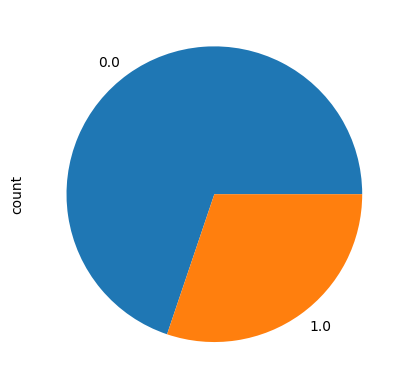

In [ ]:
df1.Target.value_counts().plot(kind = 'pie');

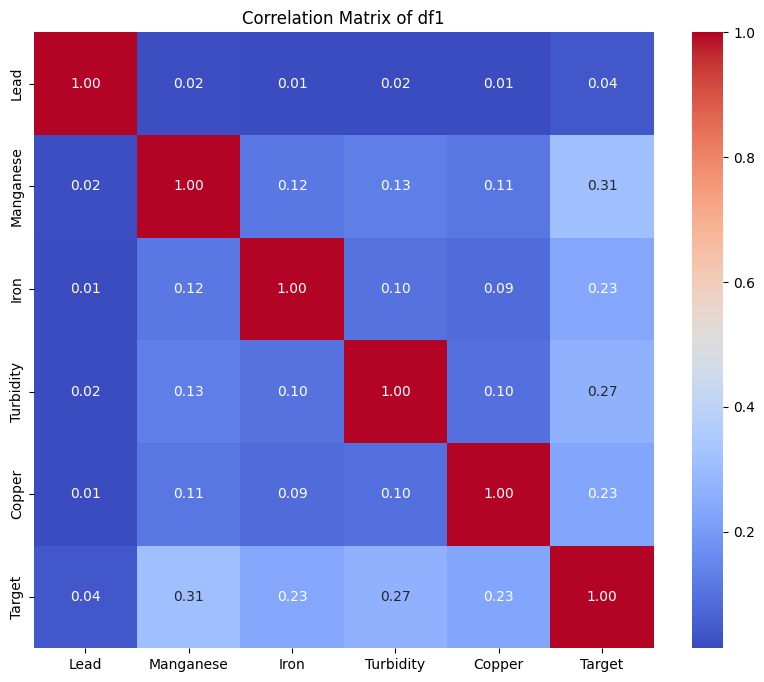

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df1.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of df1')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report, confusion_matrix
from tqdm import tqdm

In [ ]:
X = df1.drop('Target', axis = 1)
y = df1.Target

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2,
                                                    random_state = 42)

In [ ]:
# Calculate the class weights
classes = np.unique(y_train)
class_weights = compute_class_weight(class_weight = 'balanced',
                                      classes = classes,
                                      y = y_train)
class_weight_dict = dict(zip(classes,class_weights))

In [ ]:
# Let us start with building the mcahine learning model now
model_1 = SGDClassifier(loss = 'log_loss',
                        random_state = 42)
epochs = 10
batch_size = 50000

for epoch in tqdm(range(epochs), desc = "Epoch Progress",
                  unit = "epoch"):
  for i in tqdm(range(0, len(X_train), batch_size),
                desc = "Batch Progress",
                unit = "batch",
                leave = False):
                X_batch = X_train[i:i + batch_size]
                y_batch = y_train[i:i + batch_size]

                model_1.partial_fit(X_batch,
                                    y_batch,
                                    classes = classes,
                                    sample_weight = [class_weight_dict[cls] for cls in y_batch])

Epoch Progress: 100%|██████████| 10/10 [00:33<00:00,  3.34s/epoch]


Classification Report
              precision    recall  f1-score   support

         0.0       0.86      0.50      0.63    557671
         1.0       0.41      0.81      0.54    241004

    accuracy                           0.59    798675
   macro avg       0.63      0.65      0.59    798675
weighted avg       0.72      0.59      0.61    798675



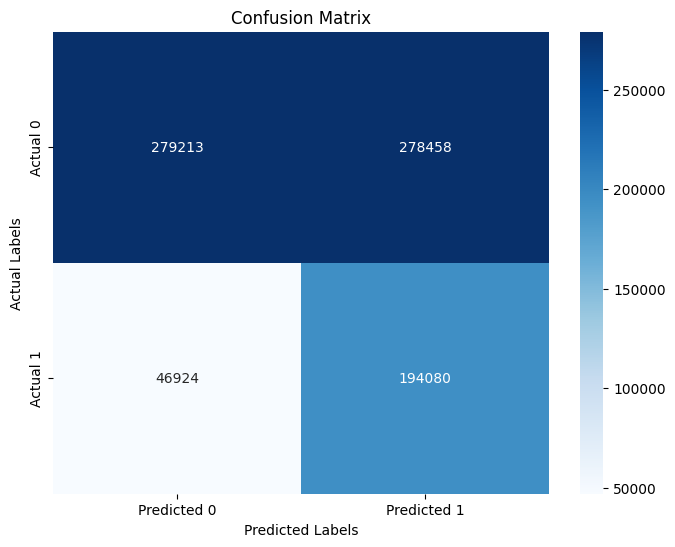

In [ ]:
y_pred = model_1.predict(X_test)

print("Classification Report")
print(classification_report(y_test, y_pred))

# Generate the confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize = (8, 6))
sns.heatmap(cm,
            annot = True,
            fmt = "d",
            cmap = "Blues",
            xticklabels = ['Predicted 0',
                           'Predicted 1'],
            yticklabels = ['Actual 0',
                            'Actual 1'])
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
model_1.score(X_test, y_test)

0.5925977400068864

In [ ]:
from joblib import dump
model_path = '/content/drive/MyDrive/Major Project/LR_5.pkl'
dump(model_1, model_path)
print(f"Model saved to {model_path}")

Model saved to /content/drive/MyDrive/Major Project/LR_5.pkl


In [ ]:
# Now let us try adding more columns to the data frame
columns = columns + ['Chloride', 'Nitrate']

In [ ]:
columns

['Lead',
 'Manganese',
 'Iron',
 'Turbidity',
 'Copper',
 'Target',
 'Chloride',
 'Nitrate']

In [ ]:
old_index = 5
new_index = 7

columns.insert(new_index, columns.pop(old_index))
columns

['Lead',
 'Manganese',
 'Iron',
 'Turbidity',
 'Copper',
 'Chloride',
 'Nitrate',
 'Target']

In [ ]:
df2 = df[columns]

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4001471 entries, 0 to 4001470
Data columns (total 8 columns):
 #   Column     Dtype  
---  ------     -----  
 0   Lead       float64
 1   Manganese  float64
 2   Iron       float64
 3   Turbidity  float64
 4   Copper     float64
 5   Chloride   float64
 6   Nitrate    float64
 7   Target     float64
dtypes: float64(8)
memory usage: 244.2 MB


In [ ]:
df2.head()

,Lead,Manganese,Iron,Turbidity,Copper,Chloride,Nitrate,Target
0,0.0,-0.038686,-0.039780,-0.325408,0.156726,0.639275,-0.505322,0.0
1,0.0,4.165028,0.327812,0.188385,0.145798,0.688948,-0.482927,0.0
2,0.0,0.158986,-0.001478,-0.349548,0.469348,0.132133,1.168774,0.0
3,0.0,-0.038734,-0.041258,-0.276246,-0.087689,0.078292,0.989211,0.0
4,0.0,-0.038681,0.014160,-0.271449,0.075861,-0.237329,-0.536017,0.0


In [ ]:
df2.duplicated().sum()
df2.drop_duplicates(inplace = True)

<ipython-input-18-a690db77ff49>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.drop_duplicates(inplace = True)


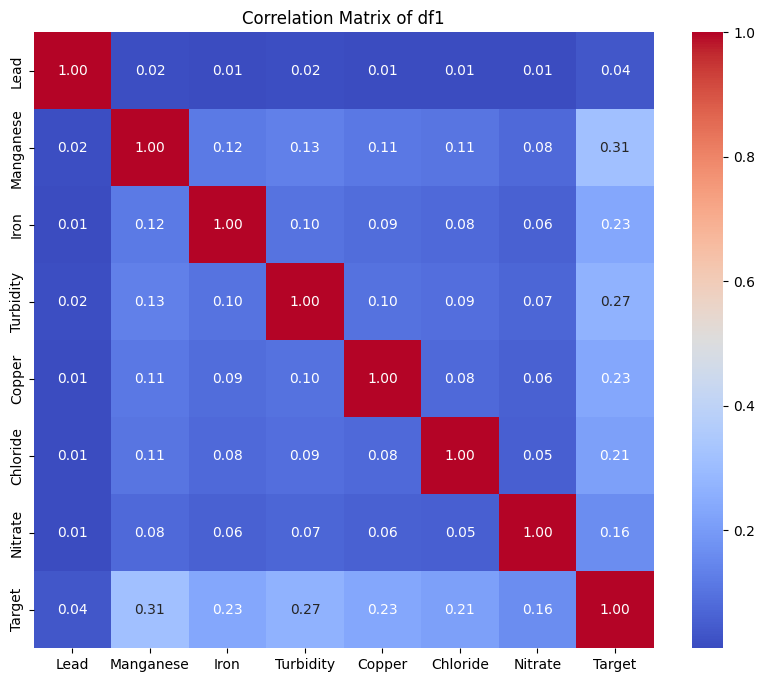

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df2.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of df1')
plt.show()

In [ ]:
X2 = df2.drop('Target', axis = 1)
y2 = df2.Target

In [ ]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2,
                                                        y2,
                                                        test_size = 0.2,
                                                        random_state = 42)

In [ ]:
classes = np.unique(y2_train)
class_weights = compute_class_weight(class_weight = 'balanced',
                                      classes = classes,
                                      y = y2_train)
class_weight_dict = dict(zip(classes,class_weights))

In [ ]:
model2 = SGDClassifier(loss = 'log_loss',
                       random_state = 42)
epochs = 10
batch_size = 50000

for epoch in tqdm(range(epochs),
                  desc = "Epoch Progress",
                  unit = 'epoch'):
  for i in tqdm(range(0, len(X2_train), batch_size),
                desc = "Batch Progress",
                unit = "batch",
                leave = False):
                X_batch = X2_train[i:i + batch_size]
                y_batch = y2_train[i:i + batch_size]
                model2.partial_fit(X_batch,
                                   y_batch,
                                   classes = classes,
                                    sample_weight = [class_weight_dict[cls] for cls in y_batch])

Epoch Progress: 100%|██████████| 10/10 [00:44<00:00,  4.47s/epoch]


Classification Report
              precision    recall  f1-score   support

         0.0       0.86      0.51      0.64    557617
         1.0       0.42      0.81      0.55    241240

    accuracy                           0.60    798857
   macro avg       0.64      0.66      0.60    798857
weighted avg       0.73      0.60      0.61    798857



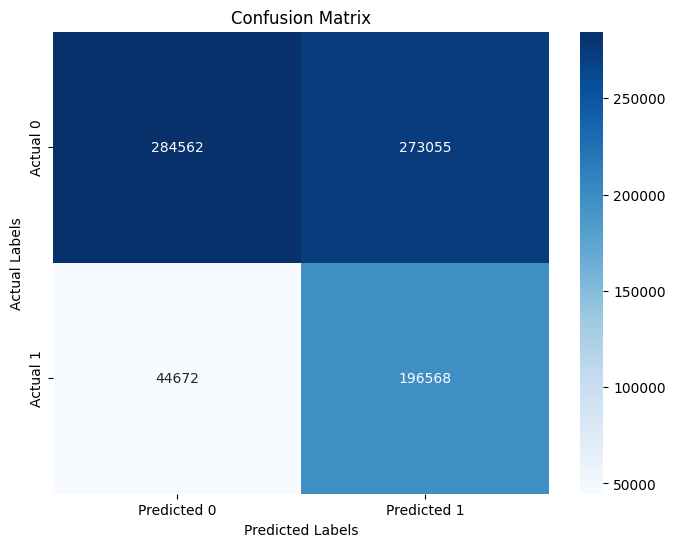

In [ ]:
y2_pred = model2.predict(X2_test)

print("Classification Report")
print(classification_report(y2_test, y2_pred))

# Generate the confusion Matrix
cm = confusion_matrix(y2_test, y2_pred)

plt.figure(figsize = (8, 6))
sns.heatmap(cm,
            annot = True,
            fmt = "d",
            cmap = "Blues",
            xticklabels = ['Predicted 0',
                           'Predicted 1'],
            yticklabels = ['Actual 0',
                            'Actual 1'])
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.title("Confusion Matrix")
plt.show()

Since we do not observe any significant improvement, we will shift to another model.
